

---


# ***1. Problem Definition***


---



In [1]:
#It is a Regression Problem where the goal is to predict some possible future Bitcoin prices.
#Keep in mind that towards the end i will give the idea that this problem can then be transformed into a classification problem(Invest or not invest)...



---


# ***2. Data Collection***


---



In [2]:
###PIP INSTALLS###
!pip install yfinance
!pip install ta
!pip install matplotlib
!pip install pandas
!pip install arch
!pip install tensorflow

###ΚΑΤΕΒΑΣΜΑ ΑΠΑΡΑΙΤΗΤΩΝ###
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt



  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=9314ab685436733d7de72964d8bf1feee9665dd9dddac46618e5a1753cb056a5
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 17.3 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open     Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD    BTC-USD
Date                                                                     
2017-05-01  1421.599976  1434.319946  1348.300049  1348.300049  713624000
2017-05-02  1452.819946  1473.900024  1415.689941  1421.030029  477337984
2017-05-03  1490.089966  1492.770020  1447.489990  1453.780029  583795968
2017-05-04  1537.670044  1608.910034  1490.719971  1490.719971  933548992
2017-05-05  1555.449951  1618.030029  1530.310059  1540.869995  946035968


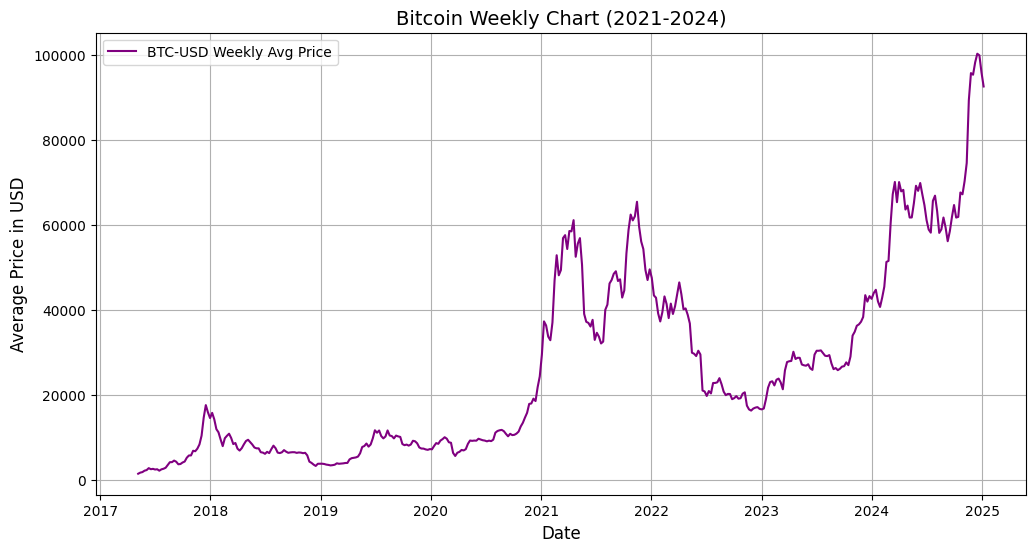

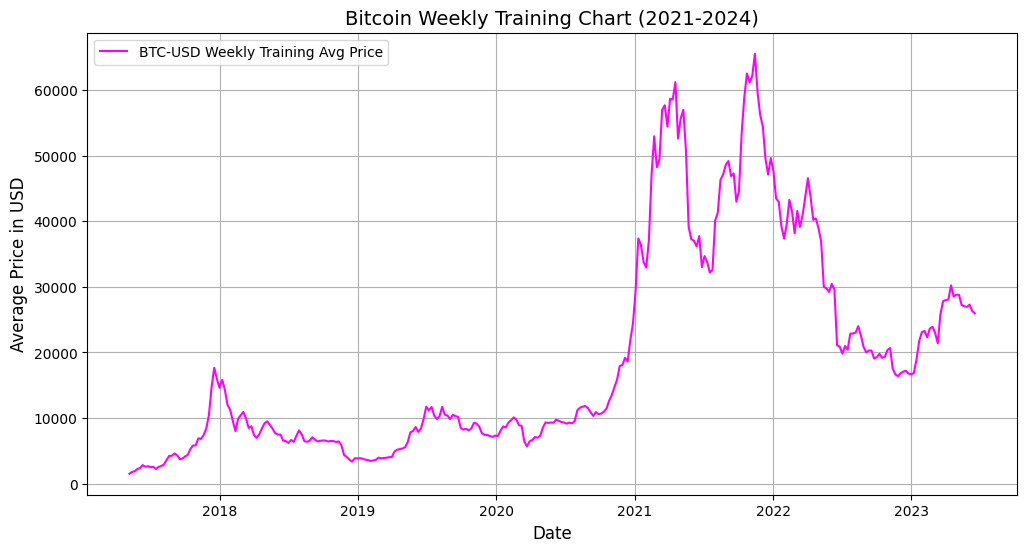

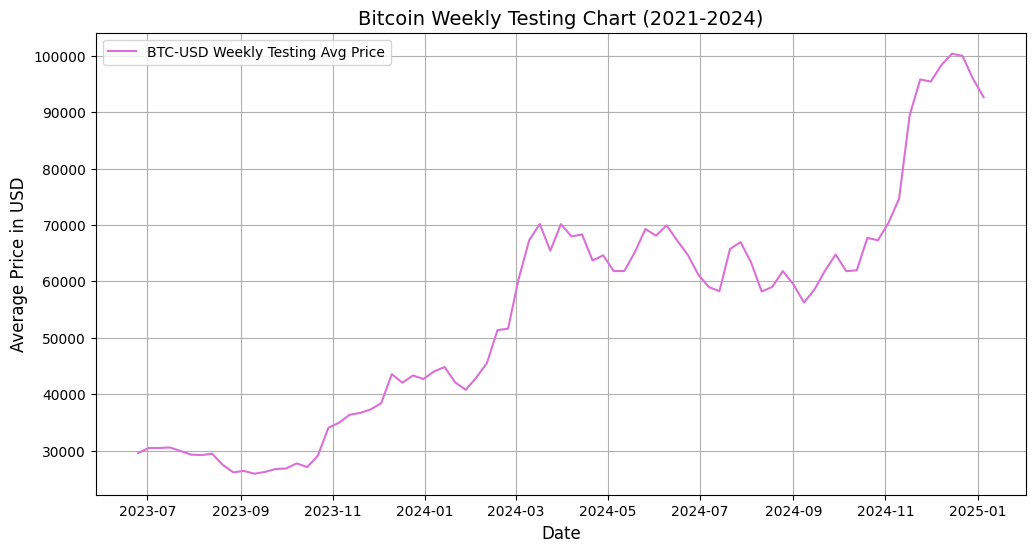

In [3]:
# Κατέβασμα δεδομένων Bitcoin από το Yahoo Finance
btc_data = yf.download("BTC-USD", start="2017-05-01", end="2024-12-31")
btc_data_train = yf.download("BTC-USD", start="2017-05-01", end="2023-06-19")
btc_data_test = yf.download("BTC-USD", start="2023-06-19", end="2024-12-31")

# Εμφάνιση των πρώτων γραμμών
print(btc_data.head())

# Αποθήκευση σε αρχείο CSV (αν χρειάζεται)
#btc_data.to_csv("bitcoin_data.csv")

# Μετατροπή των δεδομένων σε εβδομαδιαία βάση
btc_weekly = btc_data['Close'].resample('W').mean()
btc_weekly_train = btc_data_train['Close'].resample('W').mean()
btc_weekly_test = btc_data_test['Close'].resample('W').mean()

# Εμφάνιση του εβδομαδιαίου διαγράμματος
plt.figure(figsize=(12, 6))
plt.plot(btc_weekly.index, btc_weekly, label='BTC-USD Weekly Avg Price', color='purple')

plt.title('Bitcoin Weekly Chart (2021-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price in USD', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# Εμφάνιση του train διαγράμματος
plt.figure(figsize=(12, 6))
plt.plot(btc_weekly_train.index, btc_weekly_train, label='BTC-USD Weekly Training Avg Price', color='Magenta')

plt.title('Bitcoin Weekly Training Chart (2021-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price in USD', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# Εμφάνιση του test διαγράμματος
plt.figure(figsize=(12, 6))
plt.plot(btc_weekly_test.index, btc_weekly_test, label='BTC-USD Weekly Testing Avg Price', color='Orchid')

plt.title('Bitcoin Weekly Testing Chart (2021-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price in USD', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()



---


# ***3. Data Exploration and Analysis***


---



***TIME SERIES ANALYSIS***

***Trend:***

<Figure size 1000x800 with 0 Axes>

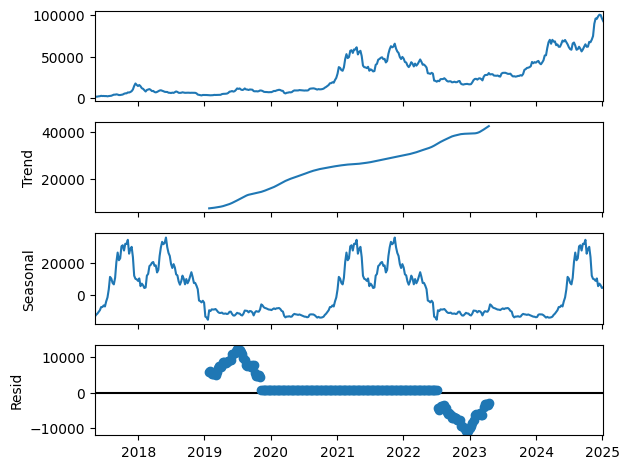

Clear depiction of HTF Trend:


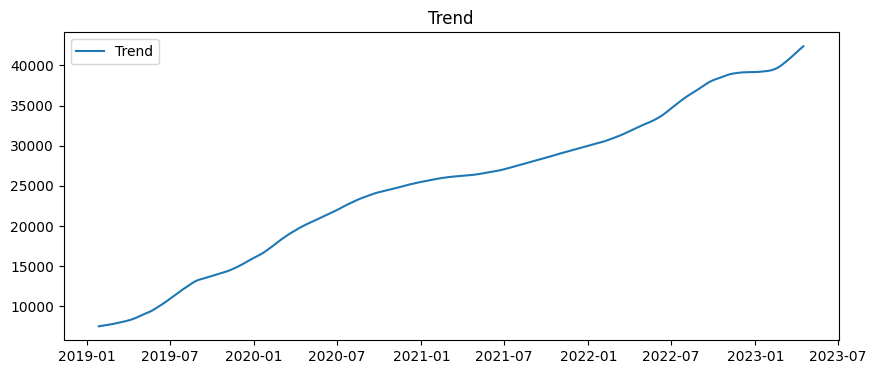

In [4]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



##FOR TREND
# Decompose the time series (additive or multiplicative)
result = seasonal_decompose(btc_weekly, model='additive', period=180)  # Weekly data with high timeframe period to identify the trend

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.show()
print(f'Clear depiction of HTF Trend:')

#plot trend
plt.figure(figsize=(10, 4))
plt.plot(result.trend, label='Trend')
plt.title('Trend')
plt.legend()
plt.show()


Seasonality (Annual)

<Figure size 1000x800 with 0 Axes>

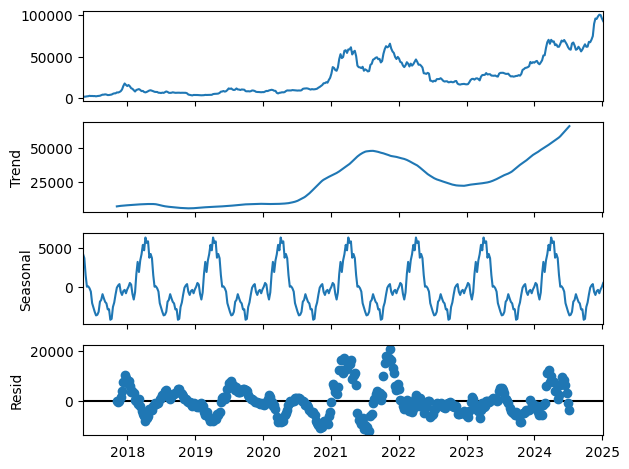

Annual seasonality:


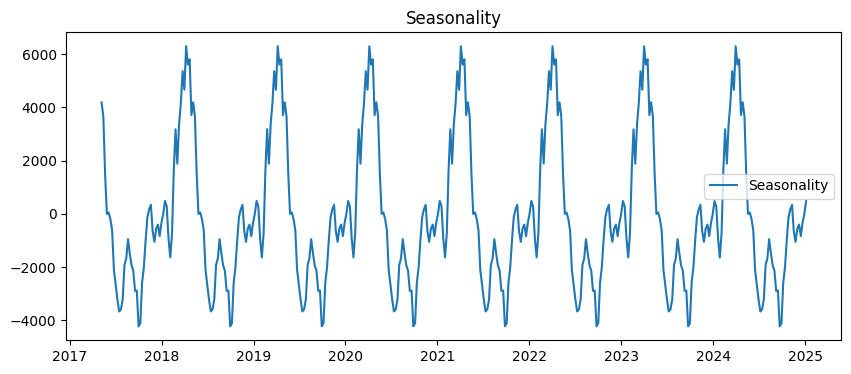

In [5]:
# Decompose the time series (additive or multiplicative)
result = seasonal_decompose(btc_weekly, model='additive', period=52)  # Weekly data with ~1 year seasonality

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.show()

print(f'Annual seasonality:')

plt.figure(figsize=(10, 4))
plt.plot(result.seasonal, label='Seasonality')
plt.title('Seasonality')
plt.legend()
plt.show()


Residuals

Annual seasonality:


<Figure size 1000x800 with 0 Axes>

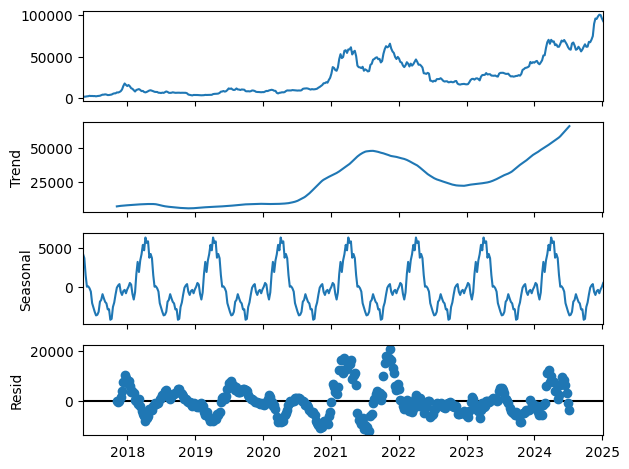

Annual Residuals:


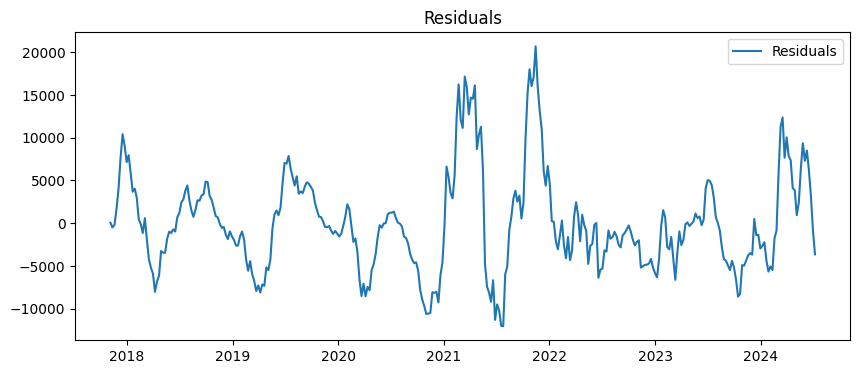

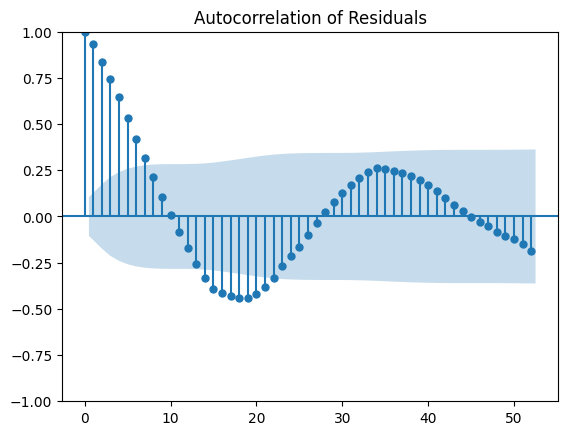

In [6]:
# Decompose the time series (additive or multiplicative)
result = seasonal_decompose(btc_weekly, model='additive', period=52)  # Weekly data with ~1 year seasonality

print(f'Annual seasonality:')

# Plot the decomposition
plt.figure(figsize=(10, 8))
result.plot()
plt.show()

print(f'Annual Residuals:')

plt.figure(figsize=(10, 4))
plt.plot(result.resid, label='Residuals')
plt.title('Residuals')
plt.legend()
plt.show()

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(result.resid.dropna(), lags=52)  # Analyze up to 2 years of weekly lags
plt.title("Autocorrelation of Residuals")
plt.show()


***OTHER USEFULL VISUALIZATIONS***

Price           Close           High            Low           Open  \
Ticker        BTC-USD        BTC-USD        BTC-USD        BTC-USD   
count     2801.000000    2801.000000    2801.000000    2801.000000   
mean     26081.550782   26637.897030   25437.601658   26050.627383   
std      22098.939349   22549.525240   21576.332243   22070.210360   
min       1421.599976    1434.319946    1348.300049    1348.300049   
25%       8041.779785    8216.812500    7830.758789    8037.080078   
50%      19201.091797   19464.671875   18813.455078   19191.529297   
75%      41143.929688   42195.632812   39825.691406   41074.105469   
max     106140.601562  108268.445312  105291.734375  106147.296875   

Price         Volume  
Ticker       BTC-USD  
count   2.801000e+03  
mean    2.489589e+10  
std     1.995825e+10  
min     4.371960e+08  
25%     1.053740e+10  
50%     2.179686e+10  
75%     3.414912e+10  
max     3.509679e+11  


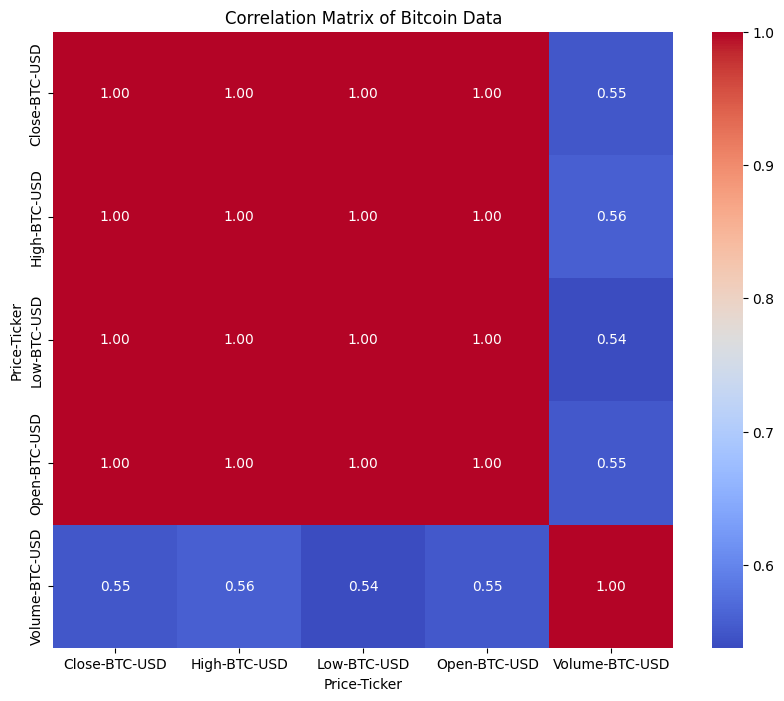

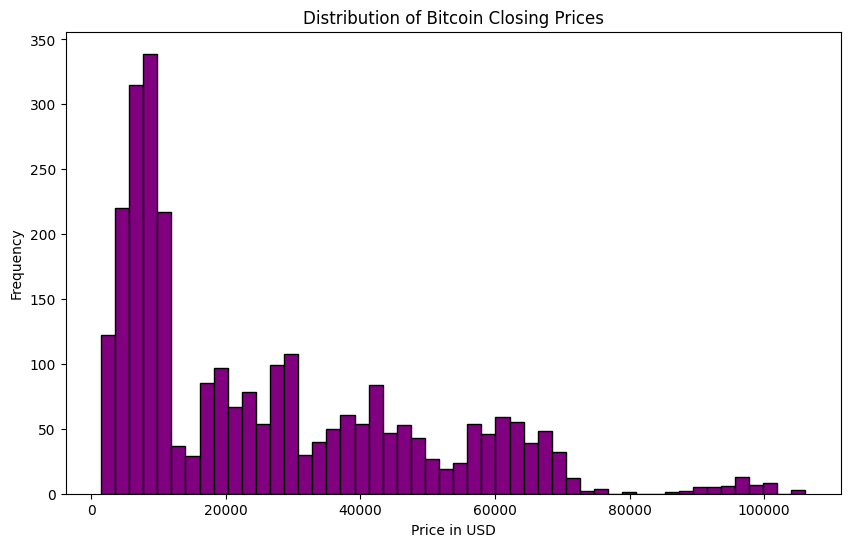

In [7]:
# Data Exploration: Summary statistics
print(btc_data.describe())

# Visualize the correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(btc_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Bitcoin Data')
plt.show()

# Plot a histogram of the closing prices
plt.figure(figsize=(10, 6))
plt.hist(btc_data['Close'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Bitcoin Closing Prices')
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.show()




---


# ***4. Data Preprocessing***


---



In [8]:
# Check for missing values
print(btc_data.isnull().sum())
print(btc_data_train.isnull().sum())
print(btc_data_test.isnull().sum())

# Fill missing values with forward fill (you can also try interpolation or removal)
btc_data = btc_data.fillna(method='ffill')

# Feature Engineering: Adding technical indicators
# Convert btc_data['Close'] to a pandas Series
btc_data['SMA_30'] = ta.trend.sma_indicator(btc_data['Close'].squeeze(), window=30)  # Simple Moving Average
btc_data['SMA_100'] = ta.trend.sma_indicator(btc_data['Close'].squeeze(), window=100)
btc_data['RSI'] = ta.momentum.rsi(btc_data['Close'].squeeze(), window=14)  # Relative Strength Index
btc_data['MACD'] = ta.trend.macd(btc_data['Close'].squeeze())  # MACD
btc_data['MACD_signal'] = ta.trend.macd_signal(btc_data['Close'].squeeze())  # MACD Signal Line

# Drop rows with missing values that may result from technical indicators
btc_data.dropna(inplace=True)

# Feature selection: We'll use the features for prediction
features = ['Close', 'SMA_30', 'SMA_100', 'RSI', 'MACD', 'MACD_signal'] # This line remains unchanged

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


<ipython-input-8-812e84802c7d>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  btc_data = btc_data.fillna(method='ffill')




---


# ***5. Model Selection - 6.Initial Model Fitting***


---



***I WILL BE USING THESE MODELS ***

Traditional Machine Learning Models:

*   Linear Regression - with OLS-MSE.
*   Logarithmic Fit
*   Exponential Fit
*   kNN - with Euclidean Distance.
*   Random Forest
*   SMA - Nothing
*   Support Vector Regression (SVR) - with ϵ-loss.




Deep Learning Models:
*   LSTM (Long Short-Term Memory) - Mean Squared Error (MSE).


As of the way they are trained:
80% dataset to Train and 20% for Testing.








***Linear Regression:***

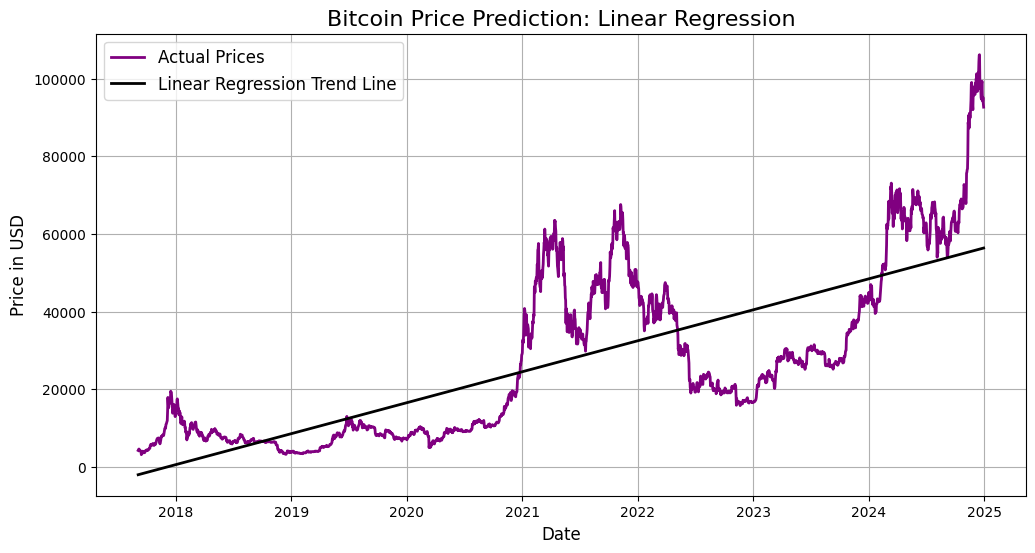

Metrics:
Mean Absolute Error: 1.899819172675086e-09
Mean Squared Error: 6.295897439256341e-18
Root Mean Squared Error: 2.5091626968485602e-09


In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all data

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.99, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Calculate linear trend line for predictions (just for visualization)
trend = np.polyfit(range(len(y_test)), y_pred, 1)  # Fit a line over time
trend_line = np.polyval(trend, range(len(y_test)))

# Plot Actual and Trend Line
plt.figure(figsize=(12, 6))

# y_test might be a pandas Series, so access values directly using .values
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, trend_line, label='Linear Regression Trend Line', color='black', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Linear Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


***LOG - CHECK LATER***


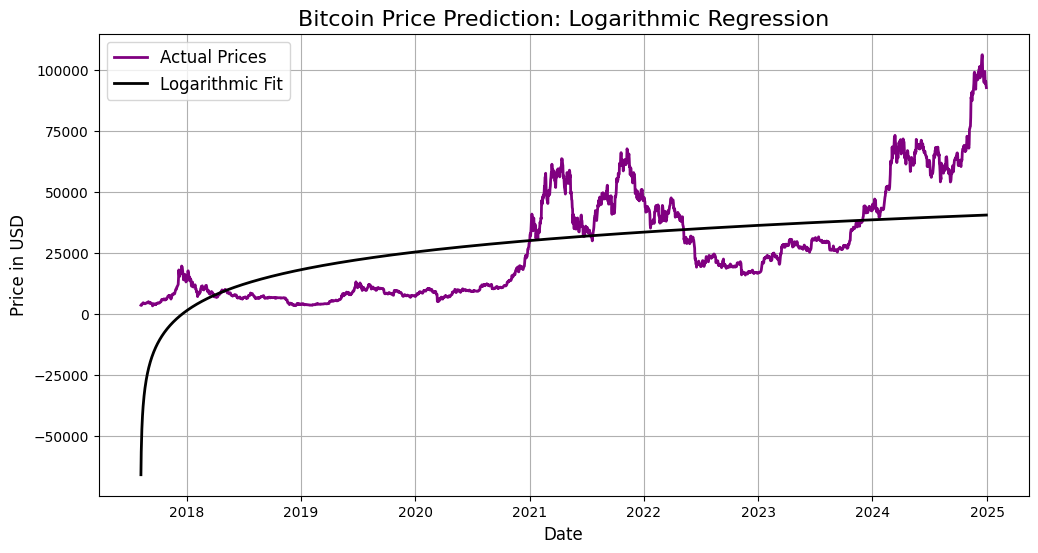

Metrics:
Mean Absolute Error: 14678.365063106661
Mean Squared Error: 305724930.0044564
Root Mean Squared Error: 17484.991564323285


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the logarithmic function
def log_function(x, a, b):
    return a + b * np.log(x)

# Prepare the data
X = btc_data.index.values.astype(float)  # Use the date index as X, convert to float
y = btc_data['Close'].values  # Target variable (Price)

# Represent dates as numerical values for logarithmic fitting
X_numeric = np.arange(len(X)) + 1  # Start from 1 to avoid log(0)

# Avoid invalid log values by ensuring X > 0 and scaling down X_numeric
X_numeric = np.where(X_numeric <= 0, 1e-9, X_numeric)  # Replace zeros or negatives with a small positive value
X_numeric = X_numeric / X_numeric.max()  # Scale X_numeric to a range between 0 and 1

# Reshape y to be 1-dimensional
y = y.ravel() #This reshapes y into a 1-dimensional array

# Fit the logarithmic function to the data
params, _ = curve_fit(log_function, X_numeric, y)  # Use X_numeric for fitting

# Get the parameters of the logarithmic model
a, b = params

# Predict using the logarithmic model
y_pred = log_function(X_numeric, a, b)  # Use X_numeric for prediction

# Evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5

# Plot Actual Prices and Logarithmic Trend Line
plt.figure(figsize=(12, 6))

plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)
plt.plot(btc_data.index, y_pred, label='Logarithmic Fit', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Logarithmic Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Log

[1.00037016 1.00074047 1.00111091 ... 2.71627052 2.71727599 2.71828183]


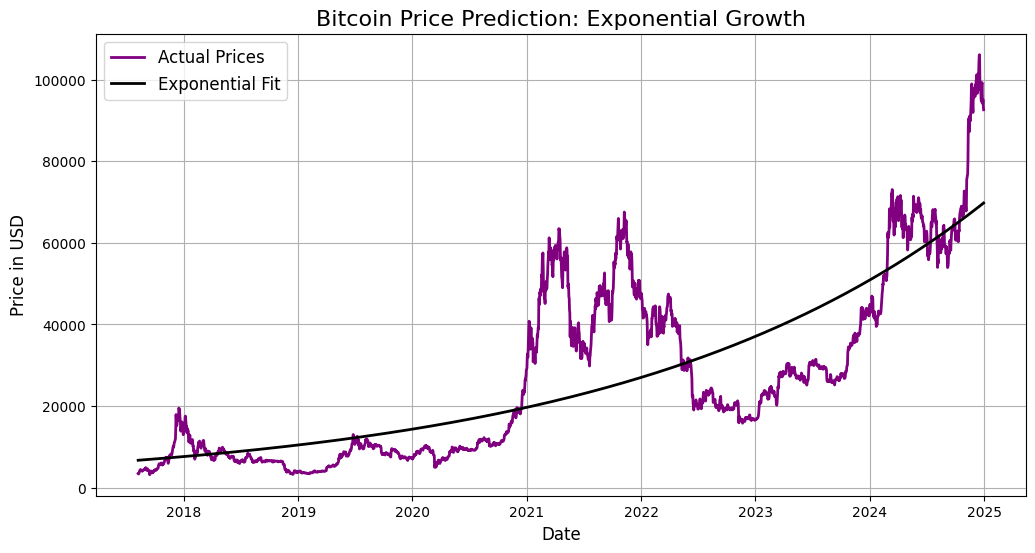

Metrics:
Mean Absolute Error: 10277.124899017663
Mean Squared Error: 180883289.23219496
Root Mean Squared Error: 13449.285826102252


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the exponential function
def exponential_function(x, a, b):
    return a * np.exp(b * x)

# Prepare the data
X = btc_data.index.values.astype(float)  # Use the date index as X, convert to float
y = btc_data['Close'].values  # Target variable (Price)

# Represent dates as numerical values for exponential fitting
X_numeric = np.arange(len(X)) + 1  # Start from 1 to avoid issues with exp(0)

# Scale X_numeric to a range between 0 and 1 for numerical stability
X_numeric = X_numeric / X_numeric.max()

# Ensure inputs are 1-dimensional arrays
X_numeric = X_numeric.ravel()
y = y.ravel()

# Remove problematic values
X_numeric = np.nan_to_num(X_numeric, nan=1e-9, posinf=1e9, neginf=0.0)
y = np.nan_to_num(y, nan=1e-9, posinf=1e9, neginf=0.0)

# Test the function output
try:
    print(exponential_function(X_numeric, 1, 1))  # Test with dummy parameters
except Exception as e:
    print(f"Error in function output: {e}")

# Fit the exponential function to the data
params, _ = curve_fit(exponential_function, X_numeric, y, maxfev=10000)

# Get the parameters of the exponential model
a, b = params

# Predict using the exponential model
y_pred = exponential_function(X_numeric, a, b)

# Evaluate the model
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse**0.5

# Plot Actual Prices and Exponential Trend Line
plt.figure(figsize=(12, 6))

plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)
plt.plot(btc_data.index, y_pred, label='Exponential Fit', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Exponential Growth', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


***kNN***

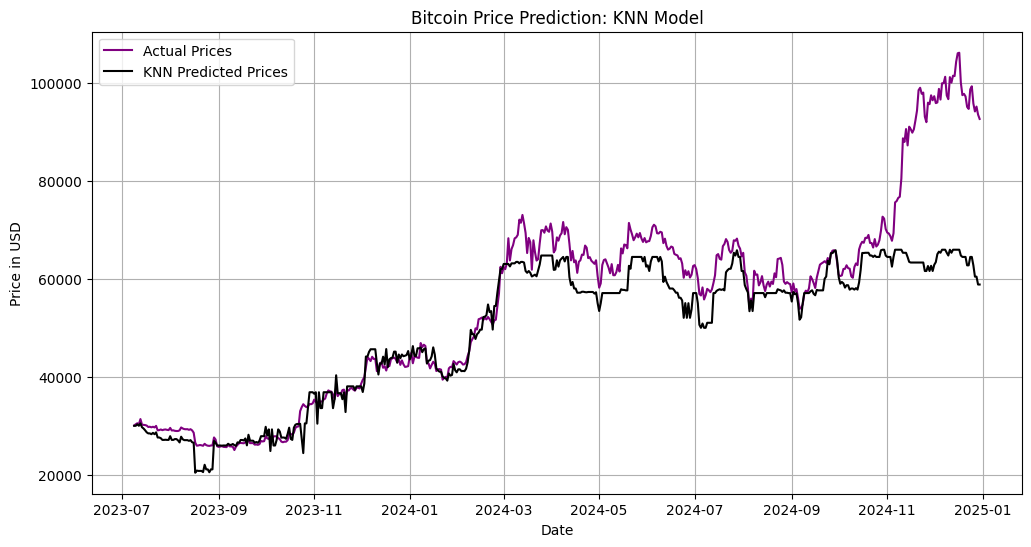

Model Evaluation Metrics:
Mean Absolute Error (MAE): 5883.01
Mean Squared Error (MSE): 114373956.93
R-squared (R2): 0.72


In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)
### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)  # The error was here
X_scaled = scaler.fit_transform(btc_data[features])  # Scale the features in btc_data

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL ###
# Initialize the KNN Regressor with k=5 (you can tune this parameter)
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### PLOT ACTUAL VS PREDICTED ###
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label="Actual Prices", color='purple')
plt.plot(btc_data.index[-len(y_test):], y_pred, label="KNN Predicted Prices", color='black')

plt.title('Bitcoin Price Prediction: KNN Model')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

### MODEL EVALUATION ###
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

***Random Forest***

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


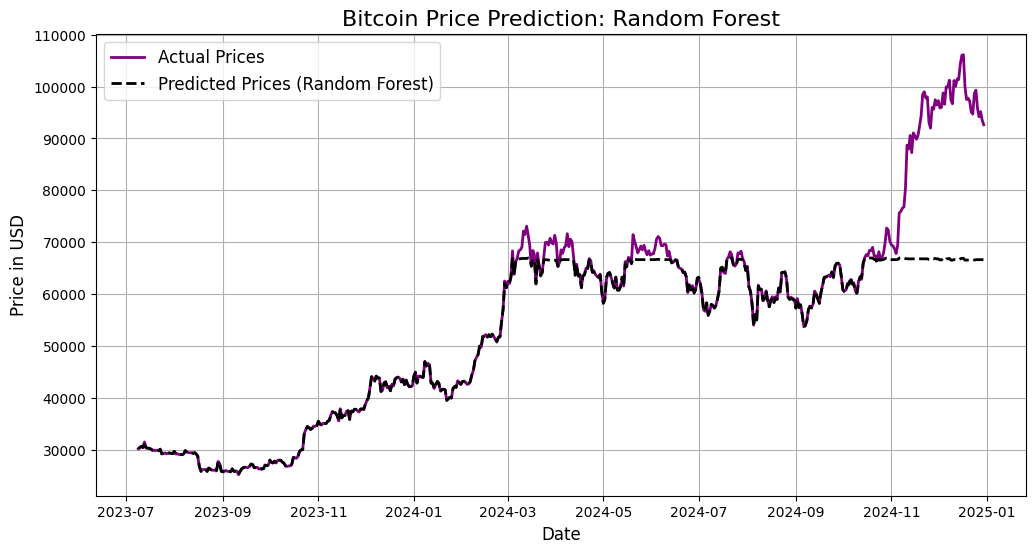

Metrics:
Random Forest - Mean Absolute Error (MAE): 3256.5538138285583
Random Forest - Mean Squared Error (MSE): 85224123.14215964
Random Forest - Root Mean Squared Error (RMSE): 9231.691239537837


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=20)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Random Forest)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Random Forest', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")

***SMA***

<ipython-input-14-a4ea154d886d>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_pred_sma = test_data['SMA'].fillna(method='bfill')  # Forward fill NaN values


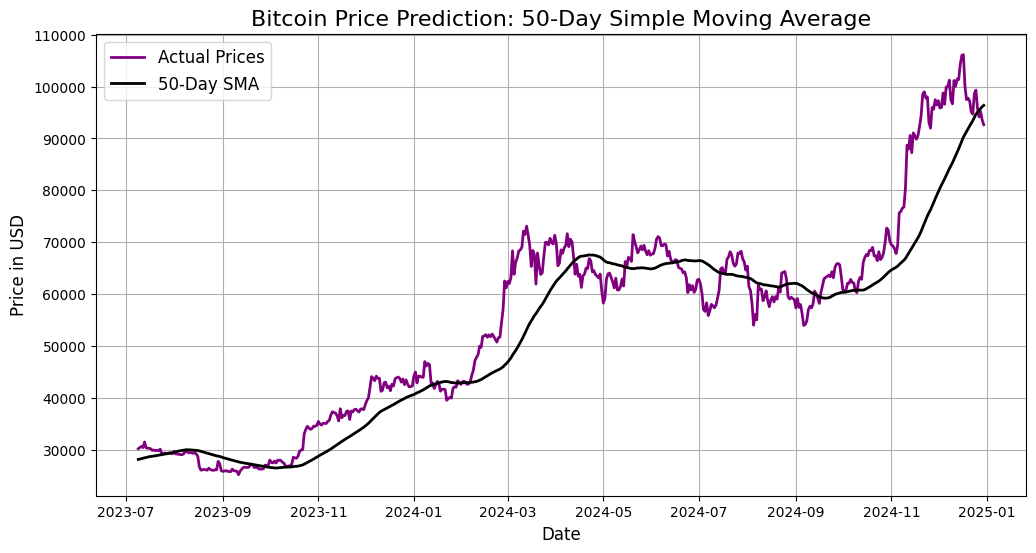

Mean Absolute Error (SMA): 4990.51065539799
Mean Squared Error (SMA): 50186587.65174327
Root Mean Squared Error (SMA): 7084.249265218105


In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the Simple Moving Average (SMA)
sma_window = 50  # You can change this value to 20, 100, etc.
btc_data['SMA'] = btc_data['Close'].rolling(window=sma_window).mean()

# Prepare the data for training and testing
train_size = int(0.8 * len(btc_data))  # 80% for training and 20% for testing
train_data = btc_data[:train_size]
test_data = btc_data[train_size:]

# Forecast using the Simple Moving Average (SMA) model
# For simplicity, we predict using the last available SMA value
y_pred_sma = test_data['SMA'].fillna(method='bfill')  # Forward fill NaN values

# True values for comparison
y_test_sma = test_data['Close']

# Remove NaN values from both y_test_sma and y_pred_sma before calculating the error
y_test_sma = y_test_sma.dropna()
y_pred_sma = y_pred_sma.dropna()

# Make sure both arrays have the same length and corresponding indices
y_pred_sma = y_pred_sma[y_pred_sma.index.isin(y_test_sma.index)]
y_test_sma = y_test_sma[y_test_sma.index.isin(y_pred_sma.index)]

# Evaluate the SMA model
mae_sma = mean_absolute_error(y_test_sma, y_pred_sma)
mse_sma = mean_squared_error(y_test_sma, y_pred_sma)
rmse_sma = np.sqrt(mse_sma)

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the actual close prices
plt.plot(test_data['Close'], label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted SMA prices
plt.plot(y_pred_sma, label=f'{sma_window}-Day SMA', color='black', linewidth=2)  # Use y_pred_sma for plotting

# Add labels, title, legend, and grid
plt.title(f'Bitcoin Price Prediction: {sma_window}-Day Simple Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Output the evaluation metrics for the SMA model
print(f'Mean Absolute Error (SMA): {mae_sma}')
print(f'Mean Squared Error (SMA): {mse_sma}')
print(f'Root Mean Squared Error (SMA): {rmse_sma}')

***SVR***

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


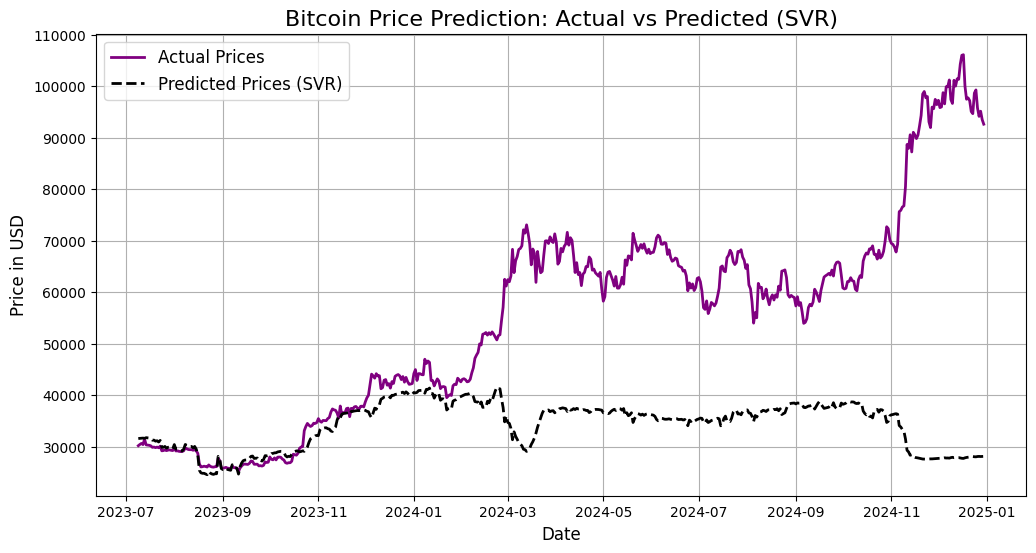

Metrics:
SVR - Mean Absolute Error (MAE): 20951.5989953906
SVR - Mean Squared Error (MSE): 839586324.8662647
SVR - Root Mean Squared Error (RMSE): 28975.616039460918


In [15]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy for sqrt function
import matplotlib.pyplot as plt # Import matplotlib for plotting


# Prepare the data for modeling (using the same features as before)
X = btc_data[features]  # Features (e.g., technical indicators)
y = btc_data['Close']  # Target variable (Bitcoin closing price)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data (important for SVM models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Machine model with an RBF kernel
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr) # Corrected: Using y_pred_svr
mse_svr = mean_squared_error(y_test, y_pred_svr)  # Corrected: Using y_pred_svr
rmse_svr = np.sqrt(mse_svr)                       # Corrected: Using mse_svr


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_svr, label='Predicted Prices (SVR)', color='black', linestyle='dashed', linewidth=2) # Corrected: Using y_pred_svr

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Actual vs Predicted (SVR)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"SVR - Mean Absolute Error (MAE): {mae_svr}")
print(f"SVR - Mean Squared Error (MSE): {mse_svr}")
print(f"SVR - Root Mean Squared Error (RMSE): {rmse_svr}")

***LSTM***

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - loss: 0.0479
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


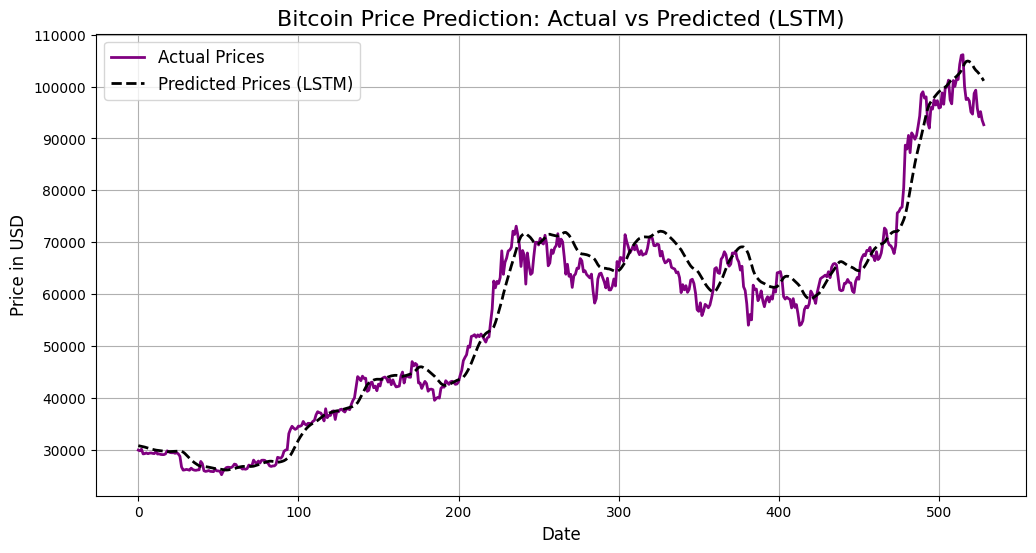

Metrics:
LSTM - Mean Absolute Error (MAE): 2665.6718565394613
LSTM - Mean Squared Error (MSE): 12981700.76237255
LSTM - Root Mean Squared Error (RMSE): 3603.01273413966


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Prepare the data for modeling
X = btc_data[features]  # Features (e.g., technical indicators)
y = btc_data['Close']  # Target variable (Bitcoin closing price)

# Scale the data to a range of 0-1 using MinMaxScaler (important for LSTM)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data[['Close']])  # Scale the target variable

# Prepare the data for supervised learning (using a time window for the LSTM)
def create_dataset(data, time_step=60):
    X_data, y_data = [], []
    for i in range(time_step, len(data)):
        X_data.append(data[i-time_step:i, 0])  # Take 'time_step' previous data points
        y_data.append(data[i, 0])  # Target is the 'Close' price
    return np.array(X_data), np.array(y_data)

# Create the dataset
time_step = 60
X_data, y_data = create_dataset(scaled_data, time_step)

# Reshape X_data for LSTM input (samples, time_steps, features)
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], 1)

# Split the data into training and testing sets
train_size = int(len(X_data) * 0.8)
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Initialize the LSTM model
lstm_model = Sequential()

# Add LSTM layers
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))  # Dropout for regularization
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))

# Add output layer
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1)

# Predict on the test set
y_pred_lstm = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values to get the original scale of the prices
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mae_lstm = mean_absolute_error(y_test_actual, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_actual, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_pred_lstm, label='Predicted Prices (LSTM)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Actual vs Predicted (LSTM)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"LSTM - Mean Absolute Error (MAE): {mae_lstm}")
print(f"LSTM - Mean Squared Error (MSE): {mse_lstm}")
print(f"LSTM - Root Mean Squared Error (RMSE): {rmse_lstm}")


***Arima***

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


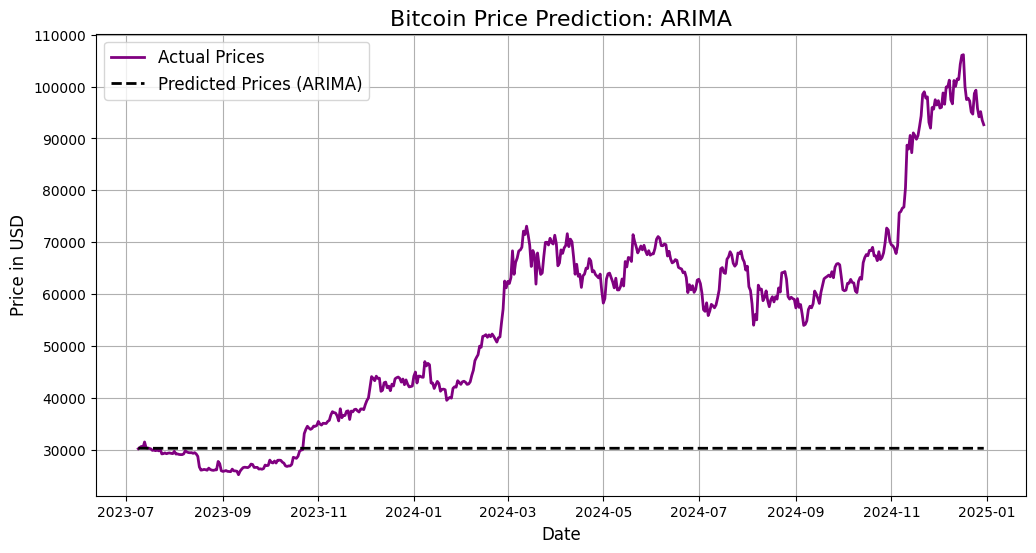

Metrics:
ARIMA Model - Mean Absolute Error (MAE): 25629.540439877506
ARIMA Model - Mean Squared Error (MSE): 1013234766.7020295
ARIMA Model - Root Mean Squared Error (RMSE): 31831.348804315996


In [17]:
# Ensure data is in the right format (use only 'Close' column for time series analysis)
btc_prices = btc_data['Close']

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(btc_prices))
train_data, test_data = btc_prices[:train_size], btc_prices[train_size:]

# Train the ARIMA model (p=5, d=1, q=0 as an example)
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA if not already imported
model_arima = ARIMA(train_data, order=(5, 1, 0))
fitted_arima = model_arima.fit()

# Forecast on the test set
forecast_arima = fitted_arima.forecast(steps=len(test_data))

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import if not already imported
import numpy as np # Import numpy if not already imported
mae_arima = mean_absolute_error(test_data, forecast_arima)
mse_arima = mean_squared_error(test_data, forecast_arima)
rmse_arima = np.sqrt(mse_arima)

# Create a date range for forecasted values
forecast_index = btc_prices.index[train_size:]

# Check if forecast_arima has valid values
import matplotlib.pyplot as plt # Import matplotlib if not already imported
if len(forecast_arima) == len(forecast_index):
    plt.figure(figsize=(12, 6))
    # Replace y_test_arima with test_data
    plt.plot(test_data.index, test_data, label='Actual Prices', color='purple', linewidth=2)
    plt.plot(forecast_index, forecast_arima, label='Predicted Prices (ARIMA)', color='black', linestyle='dashed', linewidth=2)

    # Add labels, title, legend, and grid
    plt.title('Bitcoin Price Prediction: ARIMA', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("Forecast length does not match test set length.")

# Print metrics
print(f'Metrics:')
print(f"ARIMA Model - Mean Absolute Error (MAE): {mae_arima}")
print(f"ARIMA Model - Mean Squared Error (MSE): {mse_arima}")
print(f"ARIMA Model - Root Mean Squared Error (RMSE): {rmse_arima}")



---


# ***7. Model Optimization***


***HYPERPARAMETER TUNING:***

*    GridSearchCV
*    RandomizedSearchCV
*    Hybrid Search

(for Linear regression ,Logarithmic Fit and Exponential Fit:


*   L1 - Lasso Regularization
*   L2 - Ridge Regularization
)




***CROSS-VALIDATION:***



*   K-Fold
*   Time Sereis Split
*   Leave One Out







# ***a)Linear Regression Optimization***

***L1***

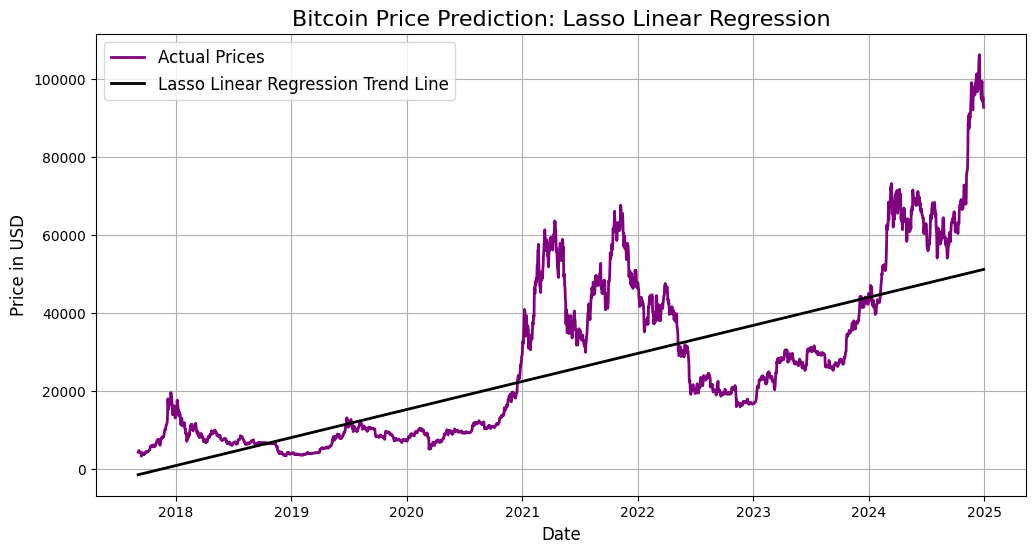

Metrics:
Mean Absolute Error: 24395.86245608502
Mean Squared Error: 104836457.67469534
Root Mean Squared Error: 32378.45852950621


In [18]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all data

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.99, shuffle=False)

# Train a Lasso (L1 regularized) Linear Regression model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength (higher alpha means more regularization)
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Calculate linear trend line for predictions (just for visualization)
trend = np.polyfit(range(len(y_test)), y_pred, 1)  # Fit a line over time
trend_line = np.polyval(trend, range(len(y_test)))

# Plot Actual and Trend Line
plt.figure(figsize=(12, 6))

# y_test might be a pandas Series, so access values directly using .values
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, trend_line, label='Lasso Linear Regression Trend Line', color='black', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Lasso Linear Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae*10}')
print(f'Mean Squared Error: {mse*10}')
print(f'Root Mean Squared Error: {rmse*10}')


***L2***

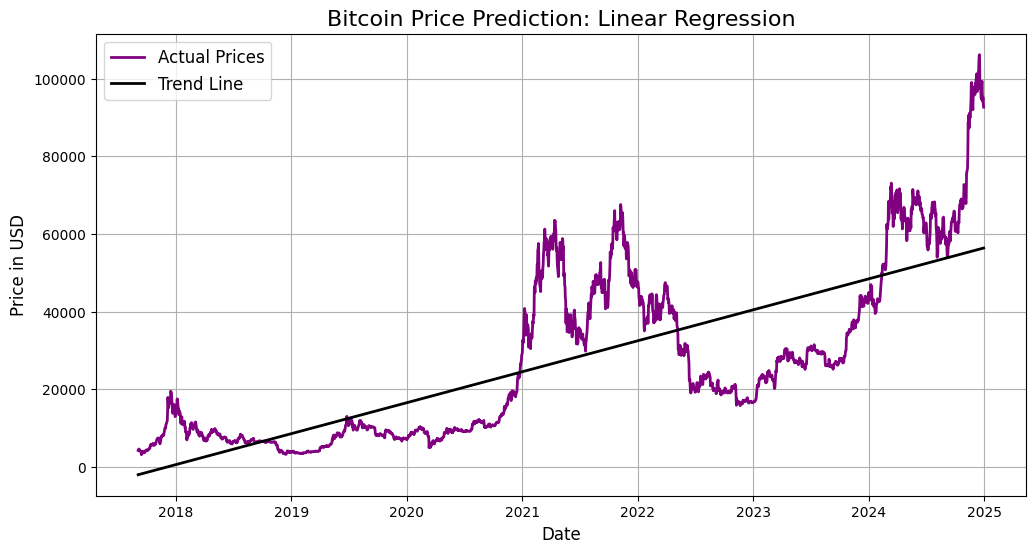

Unstandardized Metrics:
Mean Absolute Error: 34841.46610403743
Mean Squared Error: 2009893155650.6487
Root Mean Squared Error: 44831.83194618137


In [19]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare data for modeling
X = btc_data[features]
y = btc_data['Close']

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Split data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.99, shuffle=False)

# Train Linear Regression model and predict
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



# Plot actual vs. predicted trend line
trend_line = np.polyval(np.polyfit(range(len(y_test)), y_pred, 1), range(len(y_test)))
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, trend_line, label='Trend Line', color='black', linewidth=2)
plt.title('Bitcoin Price Prediction: Linear Regression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming the original scaler and predictions are available

# Unstandardize the predictions
y_pred_regular = y_pred * scaler.scale_[-1] + scaler.mean_[-1]

# Evaluate the unstandardized metrics
mae_regular = mean_absolute_error(y_test, y_pred_regular)
mse_regular = mean_squared_error(y_test, y_pred_regular)
rmse_regular = np.sqrt(mse_regular)

# Print unstandardized metrics
print(f"Unstandardized Metrics:")
print(f"Mean Absolute Error: {(mae_regular/1000)}")
print(f"Mean Squared Error: {(mse_regular/1000)}")
print(f"Root Mean Squared Error: {(rmse_regular/1000)}")


# ***b)Logarithmic Fit optimization***

***L1***

[*********************100%***********************]  1 of 1 completed


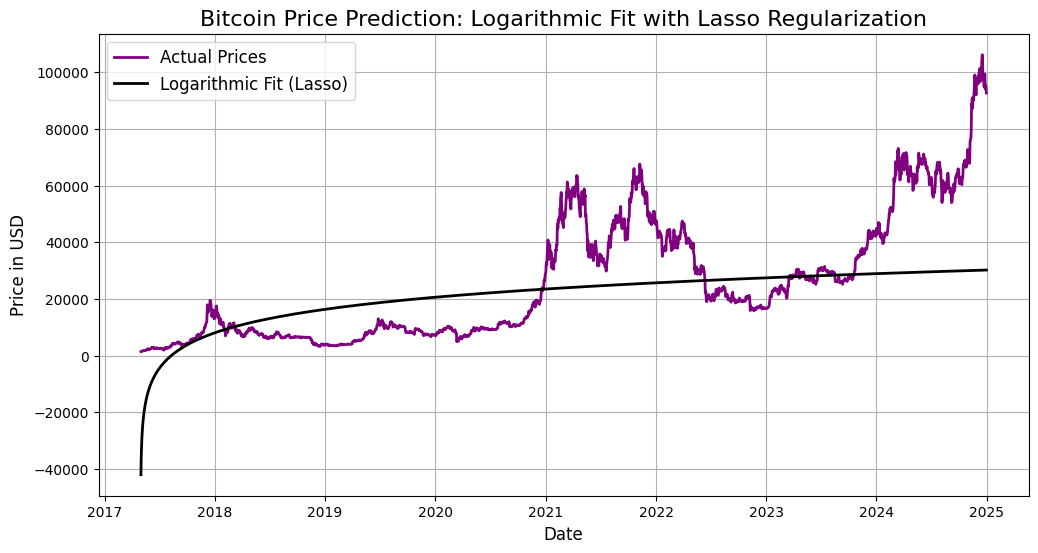

Metrics:
Mean Absolute Error: 25277.919484339884
Mean Squared Error: 1007530688.7673882
Root Mean Squared Error: 31741.623915095905


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import yfinance as yf

# Download the dataset
btc_data = yf.download("BTC-USD", start="2017-05-01", end="2024-12-31")

# Prepare the data for modeling
X = btc_data.index.values.astype(float)  # Use the date index as X, convert to float
y = btc_data['Close'].values  # Target variable (Price)

# Represent dates as numerical values for logarithmic fitting
X_numeric = np.arange(len(X)) + 1  # Start from 1 to avoid log(0)

# Avoid invalid log values by ensuring X > 0 and scaling down X_numeric
X_numeric = np.where(X_numeric <= 0, 1e-9, X_numeric)  # Replace zeros or negatives with a small positive value
X_numeric = X_numeric / X_numeric.max()  # Scale X_numeric to a range between 0 and 1

# Reshape y to be 1-dimensional
y = y.ravel()  # This reshapes y into a 1-dimensional array

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_numeric.reshape(-1, 1), y, test_size=0.2, shuffle=False)

# Apply Lasso regression (L1 regularization) on logarithmic data
lasso_model = Lasso(alpha=0.01)  # alpha controls the regularization strength
lasso_model.fit(np.log(X_train), y_train)  # Applying the log to the feature for fitting

# Predict using the trained model for the entire dataset (train + test)
y_pred_full = lasso_model.predict(np.log(X_numeric.reshape(-1, 1)))  # Using the entire X_numeric for prediction

# Plot the full range of Actual Prices and Logarithmic Fit with Lasso Regularization
plt.figure(figsize=(12, 6))

# Plot Actual Prices
plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted values (Logarithmic Fit with Lasso Regularization)
plt.plot(btc_data.index, y_pred_full, label='Logarithmic Fit (Lasso)', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Logarithmic Fit with Lasso Regularization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Evaluate the model on the test set
mae = mean_absolute_error(y_test, y_pred_full[-len(y_test):])  # Evaluate only on the test set
mse = mean_squared_error(y_test, y_pred_full[-len(y_test):])
rmse = mse**0.5

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


***L2***

[*********************100%***********************]  1 of 1 completed


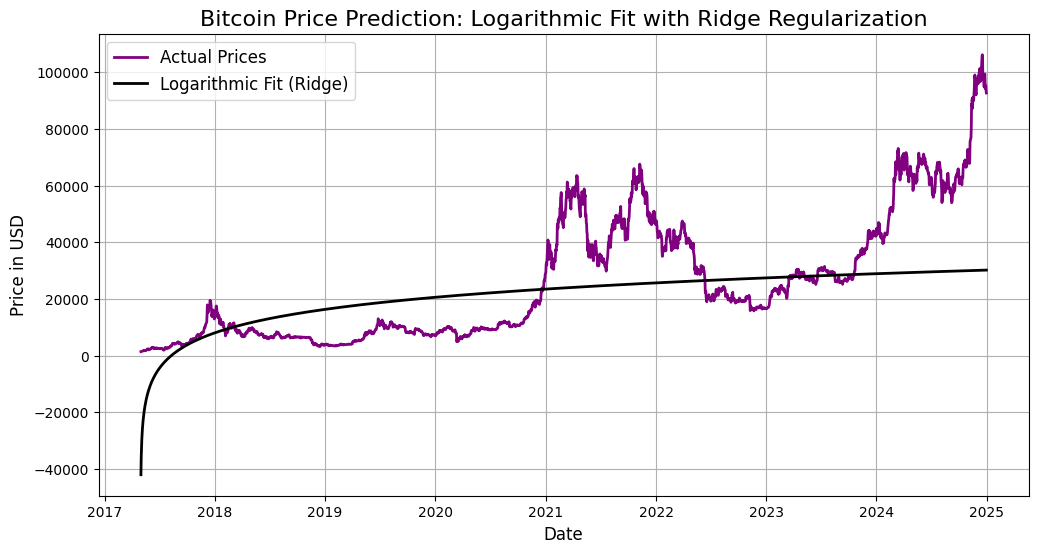

Metrics:
Mean Absolute Error: 25281.5305157956
Mean Squared Error: 1007768086.8397433
Root Mean Squared Error: 31745.363233703018


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import yfinance as yf

# Download the dataset
btc_data = yf.download("BTC-USD", start="2017-05-01", end="2024-12-31")

# Prepare the data for modeling
X = btc_data.index.values.astype(float)  # Use the date index as X, convert to float
y = btc_data['Close'].values  # Target variable (Price)

# Represent dates as numerical values for logarithmic fitting
X_numeric = np.arange(len(X)) + 1  # Start from 1 to avoid log(0)

# Avoid invalid log values by ensuring X > 0 and scaling down X_numeric
X_numeric = np.where(X_numeric <= 0, 1e-9, X_numeric)  # Replace zeros or negatives with a small positive value
X_numeric = X_numeric / X_numeric.max()  # Scale X_numeric to a range between 0 and 1

# Reshape y to be 1-dimensional
y = y.ravel()  # This reshapes y into a 1-dimensional array

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_numeric.reshape(-1, 1), y, test_size=0.2, shuffle=False)

# Apply Ridge regression (L2 regularization) on logarithmic data
ridge_model = Ridge(alpha=1.0)  # alpha controls the regularization strength
ridge_model.fit(np.log(X_train), y_train)  # Applying the log to the feature for fitting

# Predict using the trained model for the entire dataset (train + test)
y_pred_full = ridge_model.predict(np.log(X_numeric.reshape(-1, 1)))  # Using the entire X_numeric for prediction

# Plot the full range of Actual Prices and Logarithmic Fit with Ridge Regularization
plt.figure(figsize=(12, 6))

# Plot Actual Prices
plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted values (Logarithmic Fit with Ridge Regularization)
plt.plot(btc_data.index, y_pred_full, label='Logarithmic Fit (Ridge)', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Logarithmic Fit with Ridge Regularization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Evaluate the model on the test set
mae = mean_absolute_error(y_test, y_pred_full[-len(y_test):])  # Evaluate only on the test set
mse = mean_squared_error(y_test, y_pred_full[-len(y_test):])
rmse = mse**0.5

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


# ***c)Exponential Fit Optimization***

***L1***

[*********************100%***********************]  1 of 1 completed


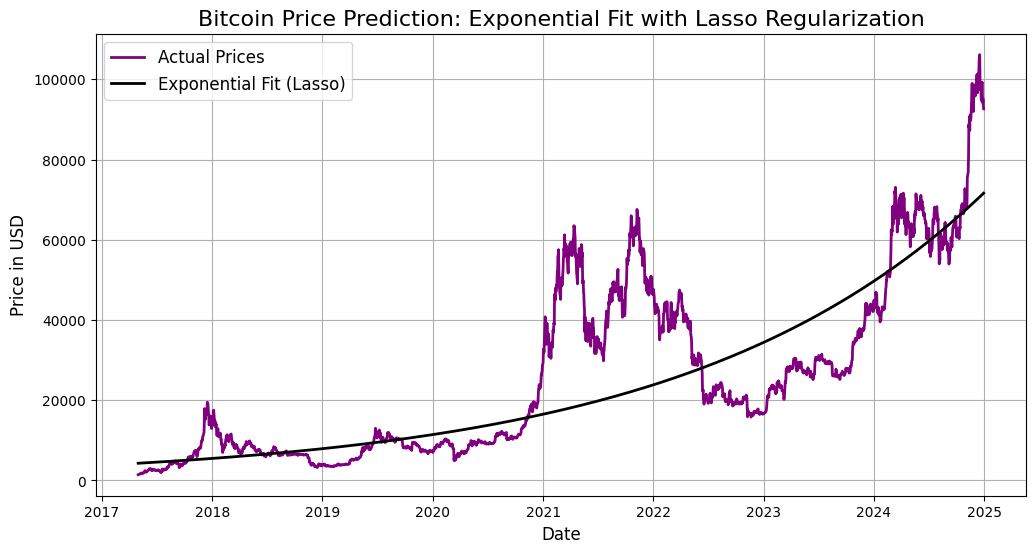

Metrics:
Mean Absolute Error: 10555.481092868991
Mean Squared Error: 164137739.50092798
Root Mean Squared Error: 12811.625170169786


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import yfinance as yf

# Download the dataset
btc_data = yf.download("BTC-USD", start="2017-05-01", end="2024-12-31")

# Prepare the data
X = np.arange(len(btc_data)) + 1  # Use numeric indices as X (starting from 1 to avoid log issues)
y = btc_data['Close'].values  # Target variable (Price)

# Scale X for numerical stability
X_scaled = X / X.max()

# Apply log transformation to y to linearize the exponential relationship
y_log = np.log(y)

# Remove problematic values
X_scaled = np.nan_to_num(X_scaled, nan=1e-9, posinf=1e9, neginf=0.0)
y_log = np.nan_to_num(y_log, nan=1e-9, posinf=1e9, neginf=0.0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled.reshape(-1, 1), y_log, test_size=0.2, shuffle=False)

# Apply Lasso regression (L1 regularization) on the log-transformed data
lasso_model = Lasso(alpha=0.01)  # alpha controls the regularization strength
lasso_model.fit(X_train, y_train)

# Predict on the entire dataset
y_pred_log = lasso_model.predict(X_scaled.reshape(-1, 1))

# Transform predictions back to the original scale
y_pred = np.exp(y_pred_log)  # Exponentiate to get back to the original price scale

# Evaluate the model on the test set
mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred_log[-len(y_test):]))
mse = mean_squared_error(np.exp(y_test), np.exp(y_pred_log[-len(y_test):]))
rmse = mse**0.5

# Plot Actual Prices and Exponential Fit with Lasso Regularization
plt.figure(figsize=(12, 6))

# Plot Actual Prices
plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted values (Exponential Fit with Lasso Regularization)
plt.plot(btc_data.index, y_pred, label='Exponential Fit (Lasso)', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Exponential Fit with Lasso Regularization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


***L2***

[*********************100%***********************]  1 of 1 completed


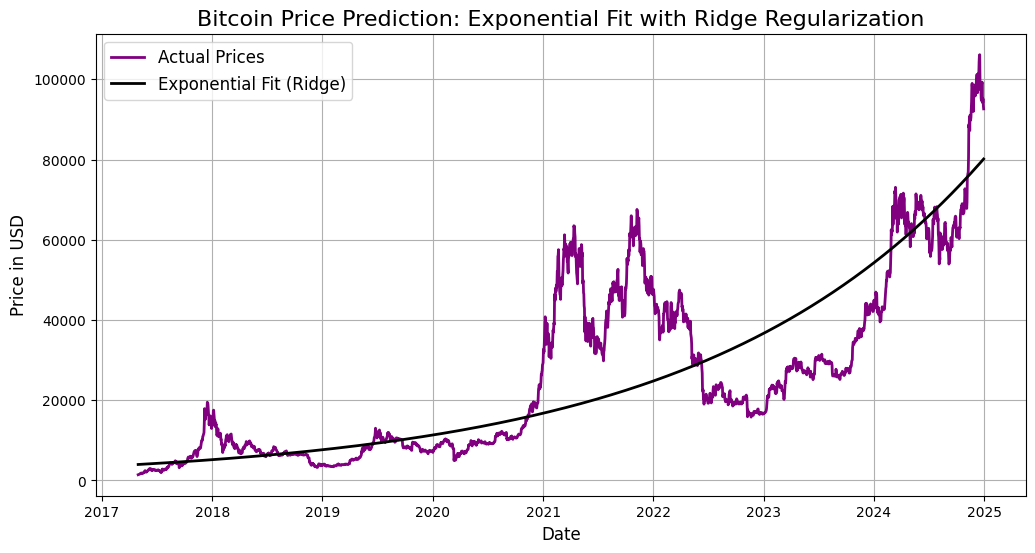

Metrics:
Mean Absolute Error: 11603.366596281001
Mean Squared Error: 175264616.06989014
Root Mean Squared Error: 13238.754324704803


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import yfinance as yf

# Download the dataset
btc_data = yf.download("BTC-USD", start="2017-05-01", end="2024-12-31")

# Prepare the data
X = np.arange(len(btc_data)) + 1  # Use numeric indices as X (starting from 1 to avoid log issues)
y = btc_data['Close'].values  # Target variable (Price)

# Scale X for numerical stability
X_scaled = X / X.max()

# Apply log transformation to y to linearize the exponential relationship
y_log = np.log(y)

# Remove problematic values
X_scaled = np.nan_to_num(X_scaled, nan=1e-9, posinf=1e9, neginf=0.0)
y_log = np.nan_to_num(y_log, nan=1e-9, posinf=1e9, neginf=0.0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled.reshape(-1, 1), y_log, test_size=0.2, shuffle=False)

# Apply Ridge regression (L2 regularization) on the log-transformed data
ridge_model = Ridge(alpha=0.01)  # alpha controls the regularization strength
ridge_model.fit(X_train, y_train)

# Predict on the entire dataset
y_pred_log = ridge_model.predict(X_scaled.reshape(-1, 1))

# Transform predictions back to the original scale
y_pred = np.exp(y_pred_log)  # Exponentiate to get back to the original price scale

# Evaluate the model on the test set
mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred_log[-len(y_test):]))
mse = mean_squared_error(np.exp(y_test), np.exp(y_pred_log[-len(y_test):]))
rmse = mse**0.5

# Plot Actual Prices and Exponential Fit with Ridge Regularization
plt.figure(figsize=(12, 6))

# Plot Actual Prices
plt.plot(btc_data.index, y, label='Actual Prices', color='purple', linewidth=2)

# Plot the predicted values (Exponential Fit with Ridge Regularization)
plt.plot(btc_data.index, y_pred, label='Exponential Fit (Ridge)', color='black', linewidth=2)

plt.title('Bitcoin Price Prediction: Exponential Fit with Ridge Regularization', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print Metrics
print(f'Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


# ***d)kNN Optimization:***

***Grid Search - kNN***

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler   # Import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import error metrics
from sklearn.preprocessing import MinMaxScaler    # Import MinMaxScaler
import matplotlib.pyplot as plt                   # Import matplotlib for plotting

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale only the features in X

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL ###
knn1=3
knn2=5
knn3=7
knn4=9
knn5=11
# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(100, 200)),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2],  # Power parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metric
}


# Initialize the GridSearchCV object
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=2, scoring='neg_mean_squared_error', verbose=2)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Extract and print the best parameters
knnGridSModel = grid_search.best_params_

# Print results
print("Best Parameters from Grid Search:")
print(knnGridSModel)

KeyError: "['SMA_30' 'SMA_100' 'RSI' 'MACD' 'MACD_signal'] not in index"

***Random Search - kNN***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Define the parameter grid for random search
param_distributions = {
    'n_neighbors': np.arange(100, 200),            # Number of neighbors to test
    'weights': ['uniform', 'distance'],         # Weighting function
    'p': [1, 2],                                # Distance metric: 1=Manhattan, 2=Euclidean
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metric to use
}

# Initialize the KNN Regressor
knn = KNeighborsRegressor()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_distributions,
    n_iter=50,                # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=2,                     # 5-fold cross-validation
    random_state=42,          # Set a seed for reproducibility
    n_jobs=-1                 # Use all available cores
)

# Perform the random search
random_search.fit(X_train, y_train)

# Extract and print the best parameters
knnRandomSModel = random_search.best_params_

# Print results
print("Best Parameters from Random Search:")
print(knnRandomSModel)


***Hybrid Search - kNN***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# Step 1: Define the broad hyperparameter space for Random Search
param_distributions = {
    'n_neighbors': np.arange(0, 200),            # Number of neighbors to test
    'weights': ['uniform', 'distance'],         # Weighting function
    'p': [1, 2],                                # Distance metric: 1=Manhattan, 2=Euclidean
    'metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metric to use
}

# Initialize the KNN model
knn = KNeighborsRegressor()

# Step 2: Perform Random Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_distributions,
    n_iter=50,                # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=2,                     # 5-fold cross-validation
    random_state=42,          # Set a seed for reproducibility
    n_jobs=-1                 # Use all available cores for faster computation
)

random_search.fit(X_train, y_train)

# Get the best parameters from Random Search
best_random_params = random_search.best_params_
print("Best Parameters from Random Search:", best_random_params)

# Step 3: Broaden the grid based on Random Search results
refined_grid_params = {
    'n_neighbors': np.arange(max(1, best_random_params['n_neighbors'] - 10), best_random_params['n_neighbors'] + 10, 2),  # Increase the range
    'weights': [best_random_params['weights']],  # Fix the best weight function
    'p': [best_random_params['p']],  # Fix the best p value
    'metric': [best_random_params['metric']]  # Fix the best distance metric
}

# Step 4: Perform Grid Search within the refined hyperparameter space
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=refined_grid_params,
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores for faster computation
)

grid_search.fit(X_train, y_train)

knnHybridSModel=grid_search.best_params_

# Print the best hyperparameters found through the hybrid search
print("Best Hyperparameters (Hybrid Search):", knnHybridSModel)




---



***Grid Search - kNN - Results***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(btc_data[features])  # Scale the features in btc_data

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL WITH BEST HYPERPARAMETERS ###
knn = KNeighborsRegressor(n_neighbors=100, metric='minkowski', p=2, weights='distance')

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### PLOT ACTUAL VS PREDICTED ###
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label="Actual Prices", color='purple')
plt.plot(btc_data.index[-len(y_test):], y_pred, label="KNN Predicted Prices", color='black')

plt.title('Bitcoin Price Prediction: KNN Model')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

### MODEL EVALUATION ###
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


***Random Search - kNN - Results***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(btc_data[features])  # Scale the features in btc_data

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL WITH BEST HYPERPARAMETERS ###
knn = KNeighborsRegressor(n_neighbors=102, metric='euclidean', p=2, weights='distance')

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### PLOT ACTUAL VS PREDICTED ###
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label="Actual Prices", color='purple')
plt.plot(btc_data.index[-len(y_test):], y_pred, label="KNN Predicted Prices", color='black')

plt.title('Bitcoin Price Prediction: KNN Model')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

### MODEL EVALUATION ###
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

***Hybrid Search - kNN - Results***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

### DATA SCALING ###
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(btc_data[features])  # Scale the features in btc_data

### TRAIN-TEST SPLIT ###
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

### KNN MODEL WITH BEST HYPERPARAMETERS ###
knn = KNeighborsRegressor(n_neighbors=3, metric='euclidean', p=2, weights='distance')

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

### PLOT ACTUAL VS PREDICTED ###
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-len(y_test):], y_test, label="Actual Prices", color='purple')
plt.plot(btc_data.index[-len(y_test):], y_pred, label="KNN Predicted Prices", color='black')

plt.title('Bitcoin Price Prediction: KNN Model')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

### MODEL EVALUATION ###
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


***Define the Best kNN Model***

In [ ]:
bestKNNModel = knnHybridSModel #Insert Best Performing Model

***Evaluate the Best kNN Model with CV K-Fold***

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np


# Extract the best estimator from the hybrid search
bestKNNModel = grid_search.best_estimator_

# Set up K-Fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle for randomness

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(
    estimator=bestKNNModel,
    X=X_train,  # Use the training data
    y=y_train,
    cv=kf,  # K-Fold object
    scoring='neg_mean_squared_error',  # Optimize for MSE
    n_jobs=-1  # Use all available cores
)

# Convert negative MSE scores to positive and calculate RMSE
mse_scores = -cv_scores  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # Root Mean Squared Error (RMSE)

# Print the RMSE for each fold and the mean RMSE
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


***Evaluate the Best kNN Model with CV TimeSeriesSplit***

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Define TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=10)  # Choose the number of splits

# Store RMSE scores for each fold
rmse_scores = []

# TimeSeriesSplit Cross-Validation
for train_index, test_index in tscv.split(X_train):  # Use X_train and y_train
    # Split the data
    X_train_split, X_test_split = X_train[train_index], X_train[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the best model on the training split
    bestKNNModel.fit(X_train_split, y_train_split)

    # Predict on the test split
    y_pred_split = bestKNNModel.predict(X_test_split)

    # Calculate RMSE for the split
    rmse = np.sqrt(mean_squared_error(y_test_split, y_pred_split))
    rmse_scores.append(rmse)

# Print the results
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


***Evaluate the Best kNN with CV Leave One Out***

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN model
knn = KNeighborsRegressor(n_neighbors=10)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV and calculate RMSE
scores = cross_val_score(
    estimator=bestKNNModel,
    X=X_train,  # Input features
    y=y_train,  # Target variable
    cv=loo,     # Leave-One-Out Cross-Validation
    scoring='neg_mean_squared_error',  # Use negative MSE
    n_jobs=-1   # Utilize all available CPU cores
)

# Convert negative MSE to RMSE
mse_scores = -scores  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # RMSE for interpretability

# Mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)

print("RMSE Scores for each fold (LOOCV):", rmse_scores)
print("Mean RMSE (LOOCV):", mean_rmse)




---



# ***e)RF Optimiziation***

Grid Search - RF

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler    # Import MinMaxScaler
import matplotlib.pyplot as plt                   # Import matplotlib for plotting

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [1, 2, 3, 4 ],             # Number of trees in the forest
    'max_depth': [None, 1, 2, 3, 4],              # Maximum depth of the tree
    'min_samples_split': [1, 2, 3, 4],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],                 # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],         # The number of features to consider for splitting at each node
    'bootstrap': [True, False]                         # Whether to use bootstrap samples for building trees
}

# Initialize the GridSearchCV object with Random Forest Regressor
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    cv=2,  # 2-fold cross-validation
    scoring='neg_mean_squared_error',  # Metric to optimize
    verbose=2
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Extract and print the best parameters
RFGridSModel = grid_search.best_params_

# Print results
print("Best Parameters from Grid Search:")
print(RFGridSModel)


Random Search - RF

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
import numpy as np  # Import numpy for parameter generation

# Define the parameter distributions for Random Search
param_grid = {
    'n_estimators': [1, 2, 3, 4 ],             # Number of trees in the forest
    'max_depth': [None, 1, 2, 3, 4],              # Maximum depth of the tree
    'min_samples_split': [1, 2, 3, 4],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],                 # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],         # The number of features to consider for splitting at each node
    'bootstrap': [True, False]                         # Whether to use bootstrap samples for building trees
}

# Initialize the RandomizedSearchCV object with Random Forest Regressor
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=2,  # 2-fold cross-validation
    random_state=42,  # Random seed for reproducibility
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Extract and print the best parameters
RFRandomSModel = random_search.best_params_

# Print results
print("Best Parameters from Random Search:")
print(RFRandomSModel)


Hyrid Search - RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# Step 1: Define the broad hyperparameter space for Random Search
param_grid = {
    'n_estimators': [1, 2, 3, 50 ],             # Number of trees in the forest
    'max_depth': [None, 1, 2, 3, 4],              # Maximum depth of the tree
    'min_samples_split': [1, 2, 3, 4],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8],                 # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],         # The number of features to consider for splitting at each node
    'bootstrap': [True, False]                         # Whether to use bootstrap samples for building trees
}

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# Step 2: Perform Random Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=2,  # 2-fold cross-validation
    random_state=42,  # Set a seed for reproducibility
    n_jobs=-1,  # Use all available cores for faster computation
    verbose=2
)

random_search.fit(X_train, y_train)

# Get the best parameters from Random Search
best_random_params = random_search.best_params_
print("Best Parameters from Random Search:", best_random_params)

# Step 3: Narrow down the grid based on Random Search results
refined_grid_params = {
    'n_estimators': [best_random_params['n_estimators'], best_random_params['n_estimators'] + 50],  # Refine the number of estimators
    'max_depth': [best_random_params['max_depth']],  # Fix the max depth
    'min_samples_split': [best_random_params['min_samples_split']],  # Fix the split value
    'min_samples_leaf': [best_random_params['min_samples_leaf']],  # Fix the leaf value
    'max_features': [best_random_params['max_features']],  # Fix the max features
    'bootstrap': [best_random_params['bootstrap']]  # Fix the bootstrap setting
}

# Step 4: Perform Grid Search within the refined hyperparameter space
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=refined_grid_params,
    scoring='neg_mean_squared_error',  # Metric to optimize
    cv=2,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores for faster computation
    verbose=2
)

grid_search.fit(X_train, y_train)

# Extract and print the best hyperparameters from the hybrid search
RFHybridSModel = grid_search.best_params_

# Print the results
print("Best Hyperparameters (Hybrid Search):")
print(RFHybridSModel)




---



***Grid Search - RF - Results***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(bootstrap= True, max_depth= None, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 2, n_estimators= 1)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Random Forest)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Random Forest', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")

***Random Search - RF - Results***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators= 3, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None, bootstrap= True)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Random Forest)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Random Forest', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")

***Hybrid Search - RF - Results***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare the data for modeling
X = btc_data[features]  # Features
y = btc_data['Close']  # Target variable (Price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
random_forest = RandomForestRegressor(bootstrap= True, max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 3)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5


# Plot Actual vs Predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='purple', linewidth=2)
plt.plot(y_test.index, y_pred_rf, label='Predicted Prices (Random Forest)', color='black', linestyle='dashed', linewidth=2)

# Add labels, title, legend, and grid
plt.title('Bitcoin Price Prediction: Random Forest', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Print metrics
print(f'Metrics:')
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf}")

***Define the Best RF Model***

In [ ]:
bestRFModel = RFHybridSModel #Insert Best Performing Model

***Evaluate the Best RF Model with CV K-Fold***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract the best estimator from the RandomizedSearchCV or GridSearchCV
bestRFModel = grid_search.best_estimator_

# Set up K-Fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle for randomness

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(
    estimator=bestRFModel,  # Use the best RandomForest model
    X=X_train,  # Use the training data
    y=y_train,
    cv=kf,  # K-Fold object
    scoring='neg_mean_squared_error',  # Optimize for MSE
    n_jobs=-1  # Use all available cores
)

# Convert negative MSE scores to positive and calculate RMSE
mse_scores = -cv_scores  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # Root Mean Squared Error (RMSE)

# Print the RMSE for each fold and the mean RMSE
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


***Evaluate the Best RF Model with CV TimeSeriesSplit***

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Define TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=10)  # Choose the number of splits

# Extract the best RandomForest model from GridSearchCV or RandomizedSearchCV
bestRFModel = grid_search.best_estimator_

# Store RMSE scores for each fold
rmse_scores = []

# TimeSeriesSplit Cross-Validation
for train_index, test_index in tscv.split(X_train):  # Use X_train and y_train
    # Split the data using .iloc for pandas DataFrame
    X_train_split, X_test_split = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_split, y_test_split = y_train.iloc[train_index], y_train.iloc[test_index]  # Use .iloc for correct indexing

    # Fit the best model on the training split
    bestRFModel.fit(X_train_split, y_train_split)

    # Predict on the test split
    y_pred_split = bestRFModel.predict(X_test_split)

    # Calculate RMSE for the split
    rmse = np.sqrt(mean_squared_error(y_test_split, y_pred_split))
    rmse_scores.append(rmse)

# Print the results
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


***Evaluate the Best RF Model with CV Leave One Out***

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor

# Initialize RandomForest model
rf_model = RandomForestRegressor(bootstrap= True, max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 3)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV and calculate RMSE
scores = cross_val_score(
    estimator=rf_model,  # Use RandomForest model
    X=X_train,  # Input features
    y=y_train,  # Target variable
    cv=loo,     # Leave-One-Out Cross-Validation
    scoring='neg_mean_squared_error',  # Use negative MSE
    n_jobs=-1   # Utilize all available CPU cores
)

# Convert negative MSE to RMSE
mse_scores = -scores  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # RMSE for interpretability

# Mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)

print("RMSE Scores for each fold (LOOCV):", rmse_scores)
print("Mean RMSE (LOOCV):", mean_rmse)



---



# ***f)SVR Optimization***






***Grid Search - SVR***

In [ ]:
from sklearn.svm import SVR                    # Import SVR
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt                   # Import matplotlib for plotting

# Define the parameter grid for SVR
param_grid = {
    'C': [1, 20, 40, 80],              # Regularization parameter
    'epsilon': [0.01, 0.2, 0.4, 2],          # Epsilon in SVR
}

# Initialize the SVR model
svr = SVR()

# Initialize the GridSearchCV object with SVR
grid_search = GridSearchCV(
    estimator=svr,                      # Estimator: SVR
    param_grid=param_grid,              # Parameter grid to search
    cv=2,                                # 2-fold cross-validation
    scoring='neg_mean_squared_error',    # Metric to optimize (Negative Mean Squared Error)
    verbose=2                            # Verbosity level
)

# Fit the model on the training data (scaled features)
grid_search.fit(X_train, y_train)

# Extract and print the best parameters
SVRGridSModel = grid_search.best_params_

# Print the best hyperparameters found
print("Best Parameters from Grid Search for SVR:")
print(SVRGridSModel)

***Random Search - SVR***

In [ ]:
from sklearn.svm import SVR                    # Import SVR
from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt                   # Import matplotlib for plotting
import numpy as np  # For generating random distributions

# Define the parameter grid for SVR
param_grid = {
    'C': [1, 20, 40, 80],              # Regularization parameter
    'epsilon': [0.01, 0.2, 0.4, 2],          # Epsilon in SVR
}

# Initialize the SVR model
svr = SVR()

# Initialize the RandomizedSearchCV object with SVR
random_search = RandomizedSearchCV(
    estimator=svr,                          # Estimator: SVR
    param_distributions=param_grid,         # Parameter distribution to sample from
    n_iter=50,                              # Number of random combinations to try
    cv=2,                                   # 2-fold cross-validation
    scoring='neg_mean_squared_error',       # Metric to optimize (Negative Mean Squared Error)
    verbose=2,                              # Verbosity level
    random_state=42,                        # For reproducibility
    n_jobs=-1                                # Use all available cores
)

# Fit the model on the training data (scaled features)
random_search.fit(X_train, y_train)

# Extract and print the best parameters
SVRRandomSModel = random_search.best_params_

# Print the best hyperparameters found
print("Best Parameters from Random Search for SVR:")
print(SVRRandomSModel)

***Hybrid Search - SVR***

In [ ]:
from sklearn.svm import SVR                    # Import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # Import RandomizedSearchCV, GridSearchCV
import numpy as np                             # For generating random distributions

# Step 1: Define the broad hyperparameter space for Random Search
param_grid = {
    'C': [1, 20, 40, 200],              # Regularization parameter
    'epsilon': [0.01, 0.2, 0.4, 2],          # Epsilon in SVR
}

# Initialize the SVR model
svr = SVR()

# Step 2: Perform Random Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_grid,
    n_iter=50,                                  # Number of random combinations to try
    scoring='neg_mean_squared_error',           # Metric to optimize
    cv=2,                                       # 2-fold cross-validation
    random_state=42,                            # Set a seed for reproducibility
    n_jobs=-1,                                  # Use all available cores for faster computation
    verbose=2                                   # Verbosity for tracking progress
)

# Fit the model on the training data (scaled features)
random_search.fit(X_train, y_train)

# Step 3: Get the best parameters from Random Search
best_random_params = random_search.best_params_
print("Best Parameters from Random Search:", best_random_params)

# Step 4: Refine the hyperparameter grid based on the results of Random Search
param_grid = {
    'C': [1, 20, 40, 80],              # Regularization parameter
    'epsilon': [0.01, 0.2, 0.4, 2],          # Epsilon in SVR
}

# Step 5: Perform Grid Search within the refined hyperparameter space
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',        # Metric to optimize
    cv=2,                                    # 2-fold cross-validation
    n_jobs=-1,                               # Use all available cores for faster computation
    verbose=2                                 # Verbosity for tracking progress
)

# Fit the model with the refined grid
grid_search.fit(X_train, y_train)

# Step 6: Extract and print the best hyperparameters from the Hybrid Search
SVRHybridSModel = grid_search.best_params_

# Print the results
print("Best Hyperparameters (Hybrid Search):")
print(SVRHybridSModel)



---



***Grid Search - SVR - Results***

In [ ]:
# Step 1: Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 2: Prepare the dataset (features and target)
X = btc_data[features].values  # Features
y = btc_data['Close'].values  # Target variable (Close price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 4: Initialize and train the SVR model
svr = SVR(kernel='rbf', C=80, epsilon=0.01)  # Radial Basis Function kernel
svr.fit(X_train, y_train)  # Train the model on the training dataset

# Step 5: Make predictions on the entire dataset
y_pred = svr.predict(X)  # Get predictions for the entire dataset

# Step 6: Plot actual vs predicted prices for the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, y, label='Actual Prices', color='purple') # Plot actual prices
plt.plot(btc_data.index, y_pred, label='Predicted Prices (SVR)', color='black') # Plot predicted prices
plt.title('Bitcoin Actual vs Predicted Prices (SVR) - Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

***Random Search - SVR - Results***

In [ ]:
# Step 1: Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 2: Prepare the dataset (features and target)
X = btc_data[features].values  # Features
y = btc_data['Close'].values  # Target variable (Close price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 4: Initialize and train the SVR model
svr = SVR(kernel='rbf', C=80, epsilon=0.01)  # Radial Basis Function kernel
svr.fit(X_train, y_train)  # Train the model on the training dataset

# Step 5: Make predictions on the entire dataset
y_pred = svr.predict(X)  # Get predictions for the entire dataset

# Step 6: Plot actual vs predicted prices for the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, y, label='Actual Prices', color='purple') # Plot actual prices
plt.plot(btc_data.index, y_pred, label='Predicted Prices (SVR)', color='black') # Plot predicted prices
plt.title('Bitcoin Actual vs Predicted Prices (SVR) - Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

***Hybrid Search - SVR - Results***

In [ ]:
# Step 1: Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 2: Prepare the dataset (features and target)
X = btc_data[features].values  # Features
y = btc_data['Close'].values  # Target variable (Close price)

# Split the data into training and testing sets
# Set test_size to 0.2 for 80% training and 20% testing, and ensure the data is not shuffled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 4: Initialize and train the SVR model
svr = SVR(kernel='rbf', C=80, epsilon=0.01)  # Radial Basis Function kernel
svr.fit(X_train, y_train)  # Train the model on the training dataset

# Step 5: Make predictions on the entire dataset
y_pred = svr.predict(X)  # Get predictions for the entire dataset

# Step 6: Plot actual vs predicted prices for the entire dataset
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, y, label='Actual Prices', color='purple') # Plot actual prices
plt.plot(btc_data.index, y_pred, label='Predicted Prices (SVR)', color='black') # Plot predicted prices
plt.title('Bitcoin Actual vs Predicted Prices (SVR) - Entire Dataset')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

***Define the Best SVR Model***

In [ ]:
bestSVRModel = SVRHybridSModel #Insert Best Performing Model

***Evaluate Best SVR Model with CV K-Fold***

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have performed RandomizedSearchCV or GridSearchCV and obtained the best model
# Extract the best estimator from the RandomizedSearchCV (or GridSearchCV)
bestSVRModel = random_search.best_estimator_  # Replace with grid_search.best_estimator_ if using GridSearchCV

# Set up K-Fold cross-validation
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # Shuffle for randomness

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(
    estimator=bestSVRModel,  # Use the best SVR model
    X=X_train,  # Use the training data
    y=y_train,
    cv=kf,  # K-Fold object
    scoring='neg_mean_squared_error',  # Optimize for MSE (Negative MSE for cross_val_score)
    n_jobs=-1  # Use all available cores
)

# Convert negative MSE scores to positive and calculate RMSE
mse_scores = -cv_scores  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # Root Mean Squared Error (RMSE)

# Print the RMSE for each fold and the mean RMSE
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))


***Evaluate Best SVR Model with CV TimeSeriesSplit***

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

# Define TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=10)  # Choose the number of splits

# Store RMSE scores for each fold
rmse_scores = []

# TimeSeriesSplit Cross-Validation
for train_index, test_index in tscv.split(X_train):  # Use X_train and y_train
    # Split the data using integer indexing for NumPy arrays
    X_train_split, X_test_split = X_train[train_index], X_train[test_index]
    y_train_split, y_test_split = y_train[train_index], y_train[test_index]

    # Fit the best model on the training split
    bestSVRModel.fit(X_train_split, y_train_split)

    # Predict on the test split
    y_pred_split = bestSVRModel.predict(X_test_split)

    # Calculate RMSE for the split
    rmse = np.sqrt(mean_squared_error(y_test_split, y_pred_split))
    rmse_scores.append(rmse)

# Print the results
print("RMSE Scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

***Evaluate Best SVR Model with CV Leave One Out***

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np
from sklearn.svm import SVR  # Import SVR

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV and calculate RMSE
scores = cross_val_score(
    estimator=bestSVRModel,  # Use best SVR model
    X=X_train,  # Input features
    y=y_train,  # Target variable
    cv=loo,     # Leave-One-Out Cross-Validation
    scoring='neg_mean_squared_error',  # Use negative MSE to optimize
    n_jobs=-1   # Utilize all available CPU cores
)

# Convert negative MSE to RMSE
mse_scores = -scores  # Negative MSE to positive
rmse_scores = np.sqrt(mse_scores)  # RMSE for interpretability

# Mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)

# Print RMSE for each fold and the mean RMSE
print("RMSE Scores for each fold (LOOCV):", rmse_scores)
print("Mean RMSE (LOOCV):", mean_rmse)


# ***g)LSTM Optimization***

***Evaluate LSTM Model with K-Fold CV***

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# List to store fold RMSE results in the original scale
rmse_scores = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Fit the model for the current fold
    lstm.fit(X_train_fold, y_train_fold)

    # Predict on the validation set for the current fold
    y_pred = lstm.predict(X_val_fold)

    # Inverse transform the predictions and actual values to get them back to the original scale
    y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))
    y_val_original = scaler.inverse_transform(y_val_fold.reshape(-1, 1))

    # Calculate Mean Squared Error (MSE) for the fold in original scale
    mse = mean_squared_error(y_val_original, y_pred_original)

    # Calculate RMSE for the fold in original scale
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

    # Print RMSE for the current fold on the original scale
    print(f'Fold {fold + 1} RMSE (original scale): {rmse}')

# Calculate the average RMSE across all folds in the original scale
average_rmse = np.mean(rmse_scores)
print(f'Average RMSE across all folds (original scale): {average_rmse}')


***Evaluate LSTM Model with Time Series Split***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Only 'Close' price is used for prediction
data = btc_data[['Close']].values

# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create the dataset for LSTM (sequences)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Using `time_step` previous prices
        y.append(data[i, 0])  # Target is the next day's price
    return np.array(X), np.array(y)

time_step = 60  # Using the last 60 days to predict the next day's price

# Create dataset
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be in the form (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)  # 1 feature (price)

# The data is ready for training and validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import time
from sklearn.metrics import mean_squared_error

# Define LSTM model function
def build_lstm_model(units=50, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Initialize TimeSeriesSplit for 2 folds
tscv = TimeSeriesSplit(n_splits=2)

# Loop through each fold and train the model
total_time = 0
total_rmse = 0  # To accumulate RMSE for all folds

for fold, (train_idx, val_idx) in enumerate(tscv.split(X)):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Build and compile the LSTM model
    model = build_lstm_model(units=50, dropout_rate=0.2)

    # Time the training for each fold
    start_time = time.time()

    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    # Calculate time taken for this fold
    end_time = time.time()
    fold_time = end_time - start_time
    total_time += fold_time

    print(f"Time taken for fold {fold + 1}: {fold_time:.2f} seconds")

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate RMSE for this fold
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    total_rmse += rmse

    print(f"RMSE for fold {fold + 1}: {rmse:.4f}")

# Calculate average RMSE across all folds
avg_rmse = total_rmse / tscv.get_n_splits()
print(f"Average RMSE for all folds: {avg_rmse:.4f}")

# Total time for all folds
print(f"Total time for 2 folds: {total_time:.2f} seconds")


In [ ]:
# Reverse the scaling to get predictions in original scale
y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1))

# Calculate RMSE on the original scale
rmse_original = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
print(f"Avrage RMSE for Time Series Split: {rmse_original}")


# ***8. General Analysis - Optimizations***

We will Make the following Analysises :


*   Tecnhical Analysis
*   Fundamental Analysis
*   Psychological Analysis

and then based on the score from each analysis we will make a final Weihted formula that will tell the models how much off they are or should be from the "Analysis Value Standpoint".

# ***a)Technical Analysis***

In [26]:
# Step 1: Fetch BTC Data (Daily)
btc_data = yf.download("BTC-USD", start="2017-05-01", end="2024-12-31", interval="1d")
#btc_data = yf.download("BTC-USD", start="2020-01-01", end="2025-01-01", interval="1d")
btc_data = btc_data.dropna()

btc_data_weekly = btc_data.resample('W').last()  # Using 'last' to take the last data point of the week

[*********************100%***********************]  1 of 1 completed


***RSI***

In [27]:
import pandas as pd
import numpy as np
import yfinance as yf


# Step 2: Define RSI Calculation Function
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Step 3: Calculate Daily RSI
btc_data['RSI'] = calculate_rsi(btc_data)

# Step 4: Define Buy/Sell Signals Based on RSI
def rsi_signal(rsi, low_threshold=30, high_threshold=70):
    if rsi < low_threshold:
        return "Buy"
    elif rsi > high_threshold:
        return "Sell"
    else:
        return "Hold"

# Apply the signal function to the RSI column
btc_data['Signal'] = btc_data['RSI'].apply(lambda x: rsi_signal(x))

# Step 5: Count Only Buy and Sell Signals (Excluding Hold)
rsi_buy_count = btc_data[btc_data['Signal'] == 'Buy'].shape[0]
rsi_sell_count = btc_data[btc_data['Signal'] == 'Sell'].shape[0]

# Step 6: Print the Results
print('')
print(f"Buy signals: {rsi_buy_count}")
print(f"Sell signals: {rsi_sell_count}")



Buy signals: 311
Sell signals: 550


***ROC***

In [28]:
import pandas as pd
import numpy as np
import yfinance as yf


# Step 2: Calculate Rate of Change (ROC) for the 'Close' column
def calculate_roc(data, column, period=14):
    # ROC = (Current Price - Price N periods ago) / Price N periods ago * 100
    roc = (data[column] - data[column].shift(period)) / data[column].shift(period) * 100
    return roc

# Step 3: Calculate ROC for the 'Close' column
btc_data['ROC_Close'] = calculate_roc(btc_data, 'Close')

# Step 4: Generate Buy/Sell signals based on ROC values
def roc_signal(roc_value):
    if roc_value > 0:
        return "Buy"
    elif roc_value < 0:
        return "Sell"
    else:
        return "Hold"

# Step 5: Apply the signal function to each row
btc_data['Signal'] = btc_data['ROC_Close'].apply(roc_signal)


# Step 7: Count Buy and Sell signals
roc_buy_count = btc_data[btc_data['Signal'] == 'Buy'].shape[0]
roc_sell_count = btc_data[btc_data['Signal'] == 'Sell'].shape[0]


print(f"\nBuy signals: {roc_buy_count}")
print(f"Sell signals: {roc_sell_count}")

# Optional: Save the results to a CSV file
btc_data.to_csv('btc_data_with_roc_signals_counts.csv')



Buy signals: 1544
Sell signals: 1243


***Williams%***

In [29]:
import pandas as pd
import numpy as np
import yfinance as yf


# Step 2: Calculate Williams %R
def calculate_williams(data, period=14):
    # Highest high and lowest low over the period
    highest_high = data['High'].rolling(window=period).max()
    lowest_low = data['Low'].rolling(window=period).min()

    # Williams %R = (Highest High - Close) / (Highest High - Lowest Low) * -100
    williams_r = ((highest_high - data['Close']) / (highest_high - lowest_low)) * -100
    return williams_r

# Step 3: Calculate Williams %R for the 'Close' column
btc_data['Williams_R'] = calculate_williams(btc_data)

# Step 4: Generate Buy/Sell signals based on Williams %R
def williams_signal(williams_r_value):
    if williams_r_value < -80:
        return "Buy"
    elif williams_r_value > -20:
        return "Sell"
    else:
        return "Hold"

# Step 5: Apply the signal function to each row
btc_data['Signal'] = btc_data['Williams_R'].apply(williams_signal)


# Step 7: Count Buy and Sell signals
w_buy_count = btc_data[btc_data['Signal'] == 'Buy'].shape[0]
w_sell_count = btc_data[btc_data['Signal'] == 'Sell'].shape[0]

print(f"\nBuy signals: {w_buy_count}")
print(f"Sell signals: {w_sell_count}")

# Optional: Save the results to a CSV file
btc_data.to_csv('btc_data_with_williams_signals_counts.csv')



Buy signals: 487
Sell signals: 807


***EMA(100)***

In [30]:
import pandas as pd
import numpy as np
import yfinance as yf



# Step 2: Calculate EMA(100)
def calculate_ema(data, period=100):
    # Calculate the Exponential Moving Average
    ema = data['Close'].ewm(span=period, adjust=False).mean()
    return ema

# Step 3: Calculate EMA(100)
btc_data['EMA100'] = calculate_ema(btc_data)

# Step 5: Generate Buy/Sell signals based on EMA(100)
def ema_signal(close_price, ema_value):
    if close_price > ema_value:
        return "Buy"
    elif close_price < ema_value:
        return "Sell"
    else:
        return "Hold"

# Step 6: Apply the signal function to each row
# Correctly access 'Close' and 'EMA100' using the multi-indexed DataFrame
btc_data['Signal'] = [ema_signal(row[('Close', 'BTC-USD')], row[('EMA100', '')]) for _, row in btc_data.iterrows()]

# Step 7: Drop NaN values (due to EMA calculation)
btc_data = btc_data.dropna(subset=[('EMA100', '')])

# Step 8: Count Buy and Sell signals
ema_buy_count = btc_data[btc_data['Signal'] == 'Buy'].shape[0]
ema_sell_count = btc_data[btc_data['Signal'] == 'Sell'].shape[0]

print(f"\nBuy signals: {ema_buy_count}")
print(f"Sell signals: {ema_sell_count}")

# Optional: Save the results to a CSV file
btc_data.to_csv('btc_data_with_ema100_signals_counts.csv')



Buy signals: 1633
Sell signals: 1167


***Make a TA Final Assumption***

In [33]:
total_buys = rsi_buy_count + roc_buy_count + w_buy_count + ema_buy_count
total_sells = rsi_sell_count + roc_sell_count + w_sell_count + ema_sell_count

print(f"Total Buy signals: {total_buys}")
print(f"Total Sell signals: {total_sells}")

# Weights for each indicator
w_rsi = 0.1
w_roc = 0.25
w_williams = 0.15
w_ema100 = 0.5

# Calculate Weighted Buy and Sell signals
weighted_buy_signals = (w_rsi * rsi_buy_count) + (w_roc * roc_buy_count) + (w_williams * w_buy_count) + (w_ema100 * ema_buy_count)
weighted_sell_signals = (w_rsi * rsi_sell_count) + (w_roc * roc_sell_count) + (w_williams * w_sell_count) + (w_ema100 * ema_sell_count)

# Calculate the total weighted signals (buy + sell) for normalization
total_weighted_signals = weighted_buy_signals + weighted_sell_signals

# Calculate Weighted Percentage Buy and Sell signals independently
weighted_percentage_buy_signals = (weighted_buy_signals / total_weighted_signals) * 100
weighted_percentage_sell_signals = (weighted_sell_signals / total_weighted_signals) * 100

# Print the weighted totals
print("")
print(f"Weighted Buy signals: {weighted_buy_signals}")
print(f"Weighted Sell signals: {weighted_sell_signals}")
print("")
print(f"Weighted Percentage Buy signals: +{weighted_percentage_buy_signals}%")
print(f"Weighted Percentage Sell signals: -{weighted_percentage_sell_signals}%")
print("")

ta_value =weighted_percentage_buy_signals - 50
if weighted_percentage_buy_signals > weighted_percentage_sell_signals:
    print(f"Meaning +{abs(ta_value)}% increase in our regression Model's Price Prediction")
else:
    print(f"Meaning -{abs(ta_value)}% decrease in our regression Model's Price Prediction")
print(ta_value)

Total Buy signals: 3975
Total Sell signals: 3767

Weighted Buy signals: 1306.65
Weighted Sell signals: 1070.3

Weighted Percentage Buy signals: +54.971707440207%
Weighted Percentage Sell signals: -45.028292559793016%

Meaning +4.971707440206998% increase in our regression Model's Price Prediction
4.971707440206998


# ***b)Fundamental Analysis***

***Halvings Score***

In [34]:
from datetime import datetime, timedelta

def halving_score(halving_date, current_date):
    time_difference = (current_date - halving_date).days

    if 0 <= time_difference <= 365:  # 1 year
        return 1
    elif 365 < time_difference < 730:  # Between 1 and 2 years

        return -1
    else:  # Negative time difference (halving in the future)
        return 0

# Example Usage:
halving_date = datetime(2024, 4, 19)  # Corrected halving date (Year, Month, Day)
current_date = datetime.now()  # Replace with the desired current/reference date

h_value = halving_score(halving_date, current_date)
print(f"The halving score is: {h_value}")


The halving score is: 1


***Interest Rates***

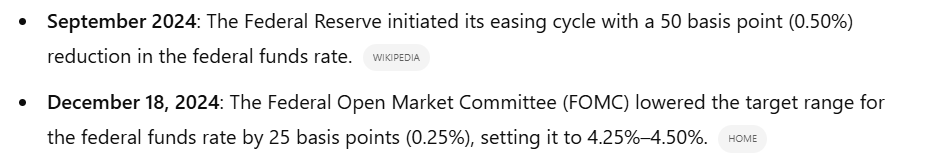

In [35]:
ir_value = (0.25 + 0.5)*3  # Big Inflation??
print(f"Value: {ir_value}")

Value: 2.25


***Inflation***

December 2024, the United States reported an annual inflation rate of 2.9%,

In [36]:
inflation=2.9
i_value = 1 if inflation > 2.5 else 0
print(f"Value: {i_value}")

Value: 1


***Adoption of Bitcoin by Institutions***

Blackrock, Fidelity, Grayscale, Microstrategy.
Pension Funds and Institutional Investments
Approval of Bitcoin ETFs
Performance of Crypto Hedge Funds

In [37]:
a_value = 2
print(f"Value: {a_value}")

Value: 2


***M2SL***

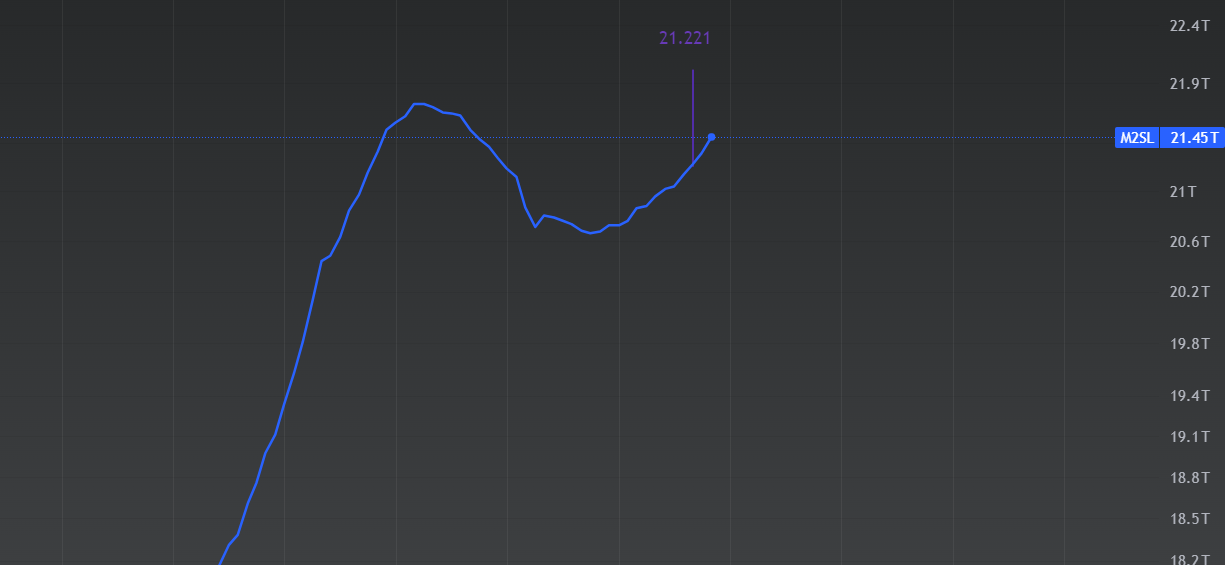

In [38]:
#Incredible Bounce and increase for M2SL

m_value = 1
print(f"Value: {m_value}")

Value: 1


***Global Liquidity***

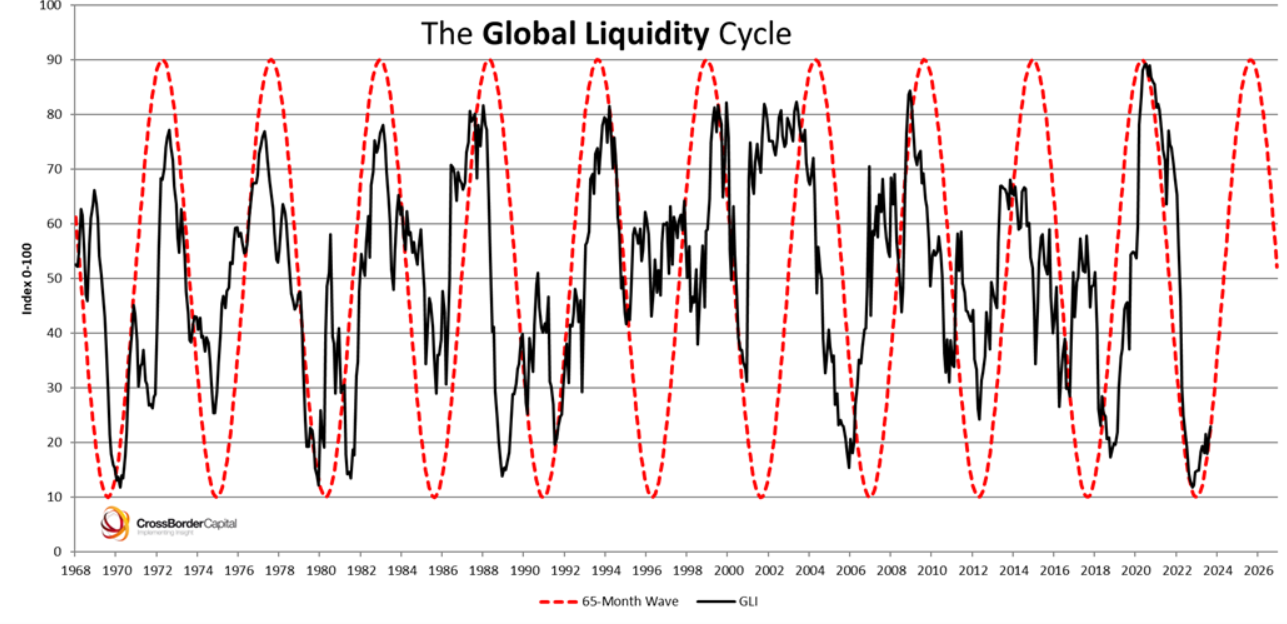

In [39]:
#Expected increase for Global Liquidity for the next 1-2 years

g_value = 1
print(f"Value: {g_value}")

Value: 1


***Make a FA Final Assumption***

In [41]:
fa_value=h_value+ir_value+i_value+a_value+m_value+g_value
print(f"Fundamental Indication: {fa_value}")

#increase-decrease in model = score*3%
if fa_value>0:
    print(f"Meaning a {fa_value}% Increase in Models's Price Prediction")
else:
    print(f"Meaning a {fa_value}% Decrease in Models's Price Prediction")

print(fa_value)

Fundamental Indication: 8.25
Meaning a 8.25% Increase in Models's Price Prediction
8.25


# ***c)Psychological Analysis***

***Fear & Greed Index***

In [42]:
import requests
import json

def get_fear_and_greed_index():
    url = "https://api.alternative.me/fng/?limit=1"  # Fear and Greed Index API
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        # Extract the relevant information from the response
        fear_and_greed_value = int(data['data'][0]['value']) # Convert to int here
        fear_and_greed_value_classification = data['data'][0]['value_classification']
        timestamp = data['data'][0]['timestamp']
        fg_value=0

        if fear_and_greed_value >=85:
          fg_value=-1
        elif fear_and_greed_value <=25:
          fg_value=1
        else:
          fg_value=0

        print(f"Fear and Greed Index: {fear_and_greed_value}")
        print(f"Classification: {fear_and_greed_value_classification}")
        print(f"Timestamp: {timestamp}")
        print(f"Value: {fg_value}")

        return fear_and_greed_value, fear_and_greed_value_classification, timestamp, fg_value
    else:
        print("Failed to retrieve Fear and Greed Index data.")
        return None



fg_value=get_fear_and_greed_index()


Fear and Greed Index: 75
Classification: Greed
Timestamp: 1736985600
Value: 0


***News***

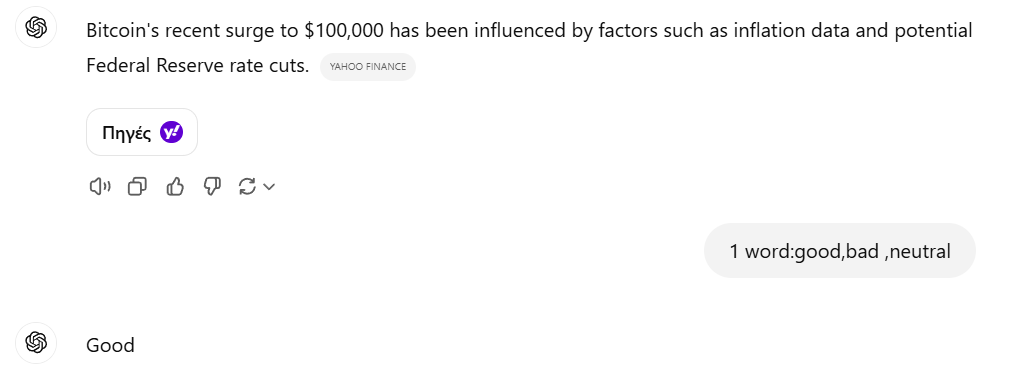

In [43]:
news_value=1
print(f"Value: {news_value}")

Value: 1


***Geoplitical Events***

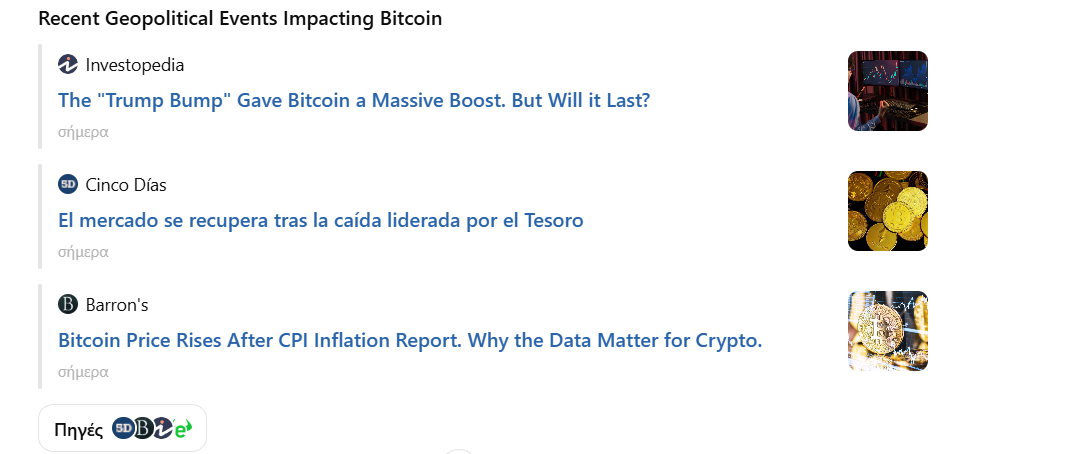

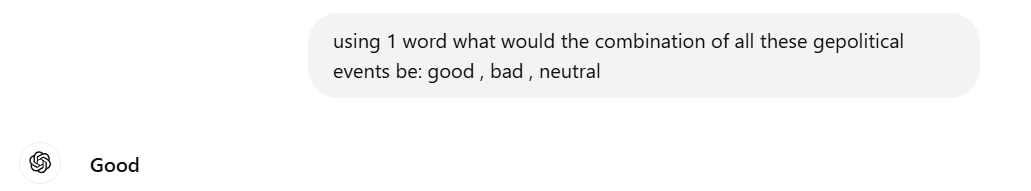

In [45]:
ge_value=1
print(f"Value: {ge_value}")

Value: 1


***Make a PA Final Assumption***

In [48]:
pa_value=fg_value[3]+news_value+ge_value
print(f"Pshycological Indication: {pa_value}/3")

#increase-decrease in model = score*3%
if pa_value>0:
    print(f"Meaning a {pa_value*3}% Increase in Models's Price Prediction")
else:
    print(f"Meaning a {pa_value*3}% Decrease in Models's Price Prediction")

pa_value=pa_value*3
print(pa_value)

Pshycological Indication: 2/3
Meaning a 6% Increase in Models's Price Prediction
6


# ***Final Analysis***

Final Analysis is Weighted Mean Price of all Previous: TA,FA,PA

In [51]:
# Define the values
ta_weight = 0.2  # Replace with your actual ta_value
fa_weight = 0.6   # Replace with your actual fa_value
pa_weight = 0.2  # Replace with your actual pa_value

# Calculate the weighted average
Total_Value = (ta_value * ta_weight + fa_value * fa_weight + pa_value * pa_weight)

# Print the result
print(f"Total Value: {Total_Value}")


Total Value: 7.1443414880414




---


# ***9. Models Evaluations***

---



***METRICS SCORES:***


-Linear Regression \
MAE: \
MSE: \
RMSE: \

-kNN \
MAE: \
MSE: \
RMSE: \

-Random Forest  \
MAE: \
MSE: \
RMSE: \

-SMA \
MAE: \
MSE: \
RMSE: \

-SVR \
MAE: \
MSE: \
RMSE: \

-LSTM \
MAE: \
MSE: \
RMSE: \

-Arima \
MAE: \
MSE: \
RMSE: \


***F1 SCORE:***

Variance-BIAS

Other Techniques

# ***10. Testing***